<a href="https://colab.research.google.com/github/sajnanoushad/-EYE-STATE-PREDICTION-USING-EEG/blob/main/EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EYE STATE PREDICTION USING EEG

-----------------------------------------------------
NAME : SAJNA NOUSHAD

ORGANIZATION : ENTRI ELEVATE

DATE :
------------------------------------------------------



# Introduction
Electroencephalography (EEG) is used to measure the brain activity which can be used as inputs for applications requiring human actions. For example, brain stimuli have been used for computer games , for handicapped persons etc. So these require accurate detection of the stimuli to avoid false predictions. Many studies has been done to find differences between the two eye states, whether eyes are open or closed.Came to the conclusion that the greatest difference between two states was that the power in the eye closed state was much higher than that in the eye open state .Investigated how to track eye blinking based on EEG input.

# Objective
The problem is to nd whether eye state can be predicted using EEG signals collected from the brain through various sensors.

# Data Collection
Source: https://archive.ics.uci.edu/dataset/264/eeg+eye+state

The total duration of the measurement is 117 seconds. The duration of the mea surement was 117 seconds. Both open or partially open eyes were categorized as open, only completely closed eyes were categorized as closed. Sensors could be split into two groups. In the first group, the maximum increases when eyes open while, in the other group, the minimum decreases in the same event. Most sensors of the first group happen to be located on the right hemisphere while most of the second group are on the left hemisphere of the brain.

Features :AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection.

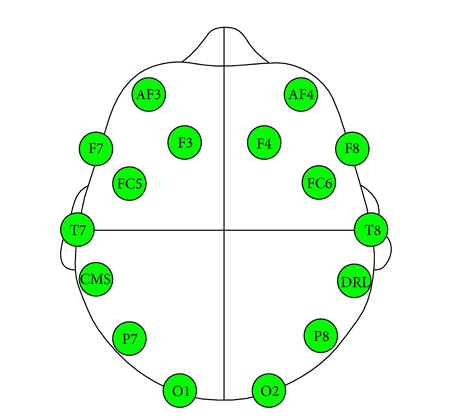

                The sensor positions placed on the brain.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
import joblib

# Load the Dataset

In [4]:
data = pd.read_csv('/content/finaleyedata.csv')

In [5]:
data.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [6]:
data.tail()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1
14979,4287.69,3997.44,4260.00,4121.03,4333.33,4616.41,4088.72,4638.46,4212.31,4226.67,4167.69,4274.36,4597.95,4350.77,1


In [7]:
data.shape

(14980, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


Total Entries: The dataset has 14,980 entries, providing a large sample size for analysis.

Column Count: There are 15 columns in total, each representing different features related to EEG data.

Data Types:

Numerical: 14 columns (e.g., AF3, F7, F3, FC5) contain numerical data, which can be used for statistical analysis and modeling.


Boolean: The eyeDetection column is a binary variable (0 or 1), suitable for classification tasks.

Missing Values: There are no missing values in this dataset, ensuring a complete dataset for analysis.

.

In [9]:
data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


# Data Preprocessing and Data Cleaning

In [10]:
data.isnull().sum()

,0
AF3,0
F7,0
F3,0
FC5,0
T7,0
P7,0
O1,0
O2,0
P8,0
T8,0


In [11]:
data.duplicated().sum()

0

In [12]:
data['eyeDetection'].value_counts()

,count
eyeDetection,
0,8257
1,6723


In [13]:
data.skew()

,0
AF3,122.293865
F7,39.046558
F3,-13.615161
FC5,122.387777
T7,7.561902
P7,122.362811
O1,122.383593
O2,51.097219
P8,122.334671
T8,10.230701


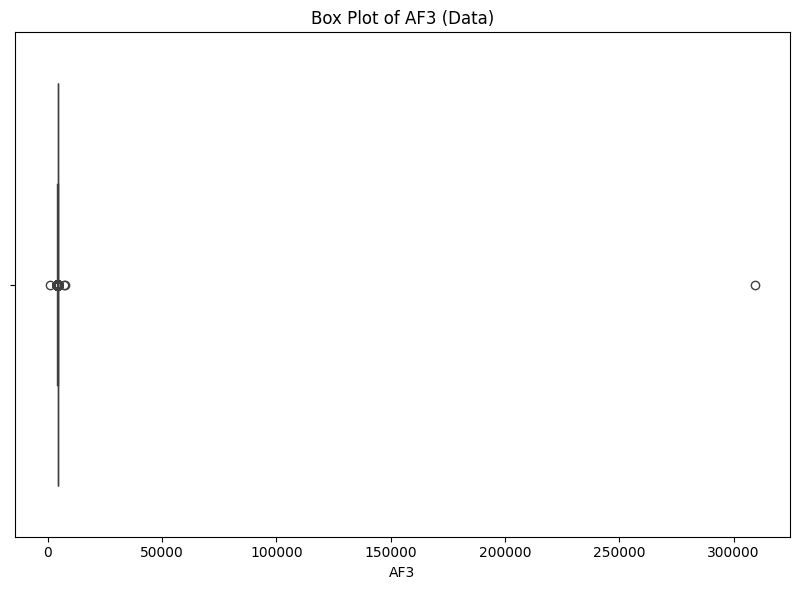

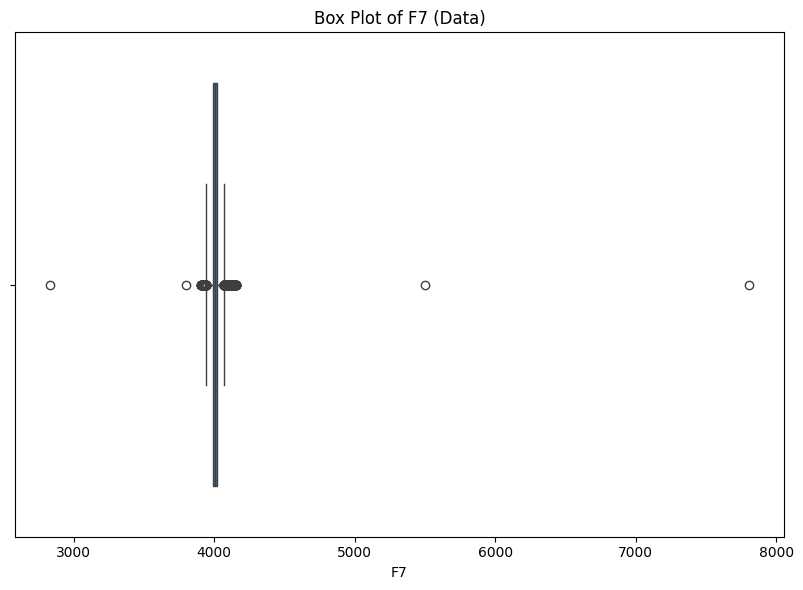

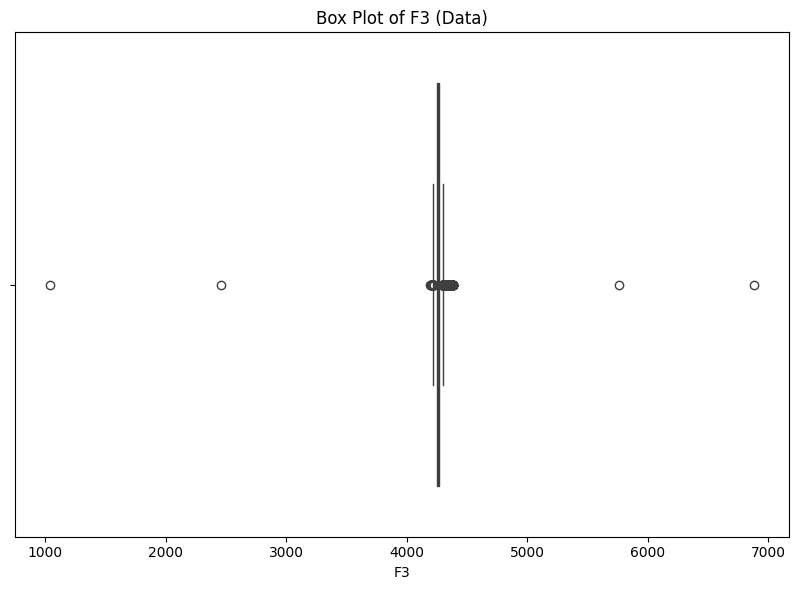

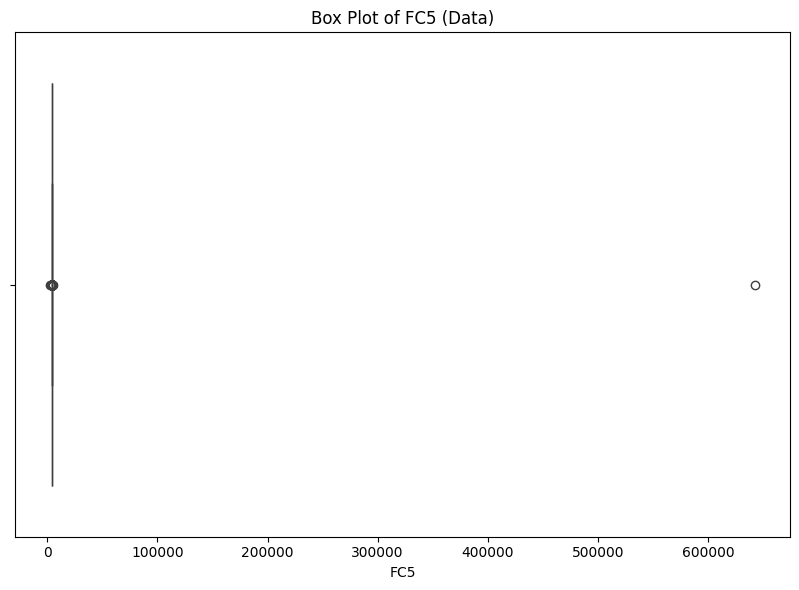

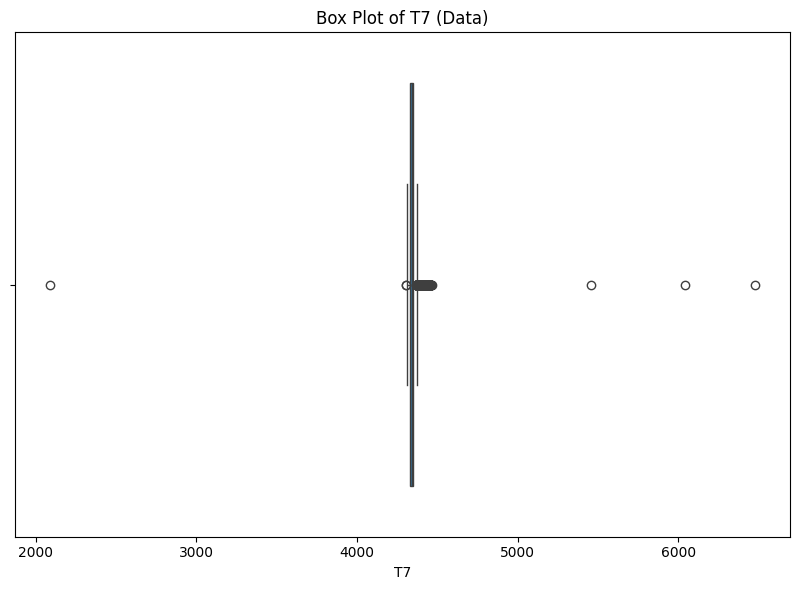

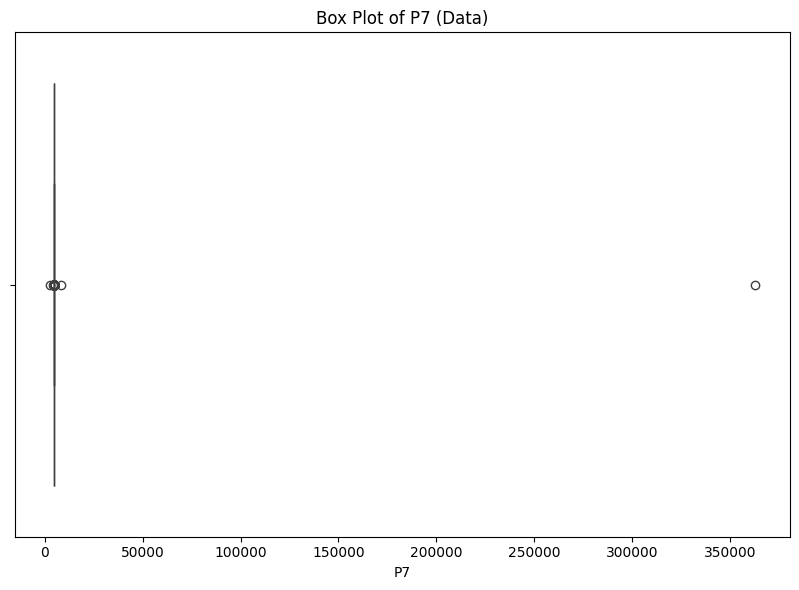

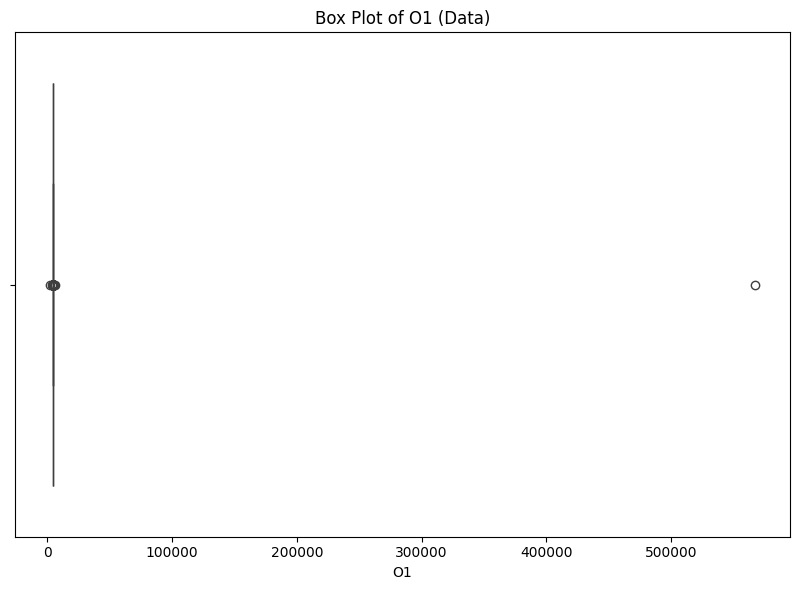

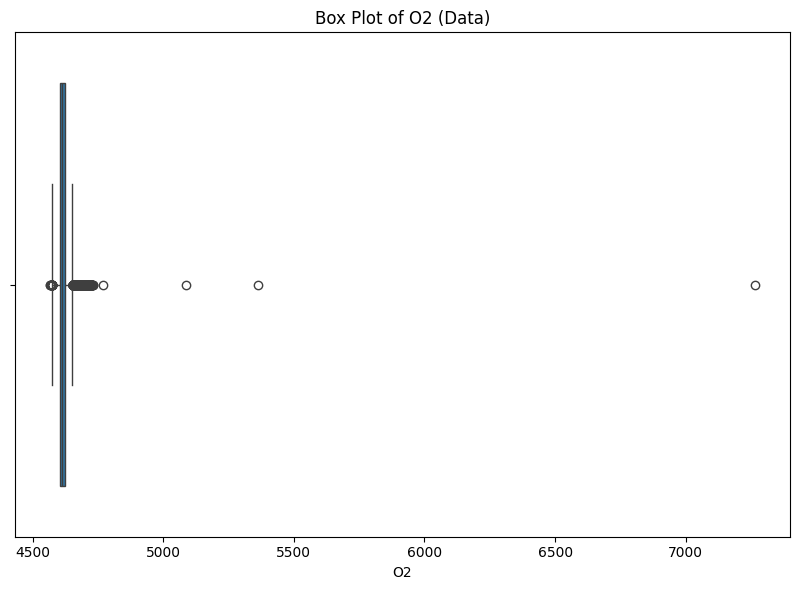

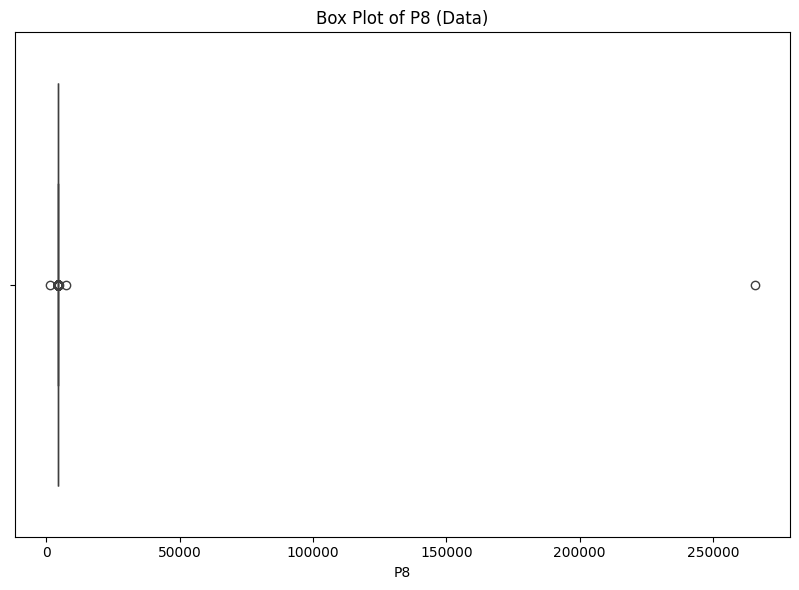

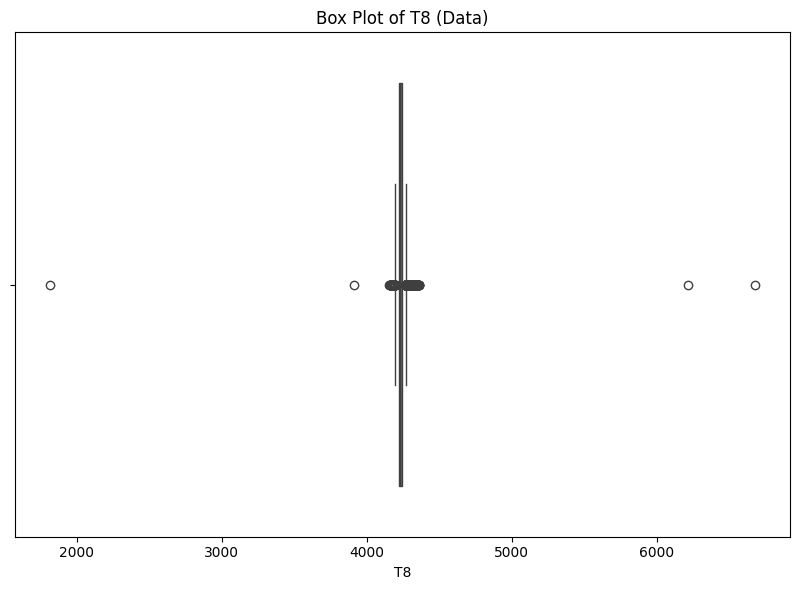

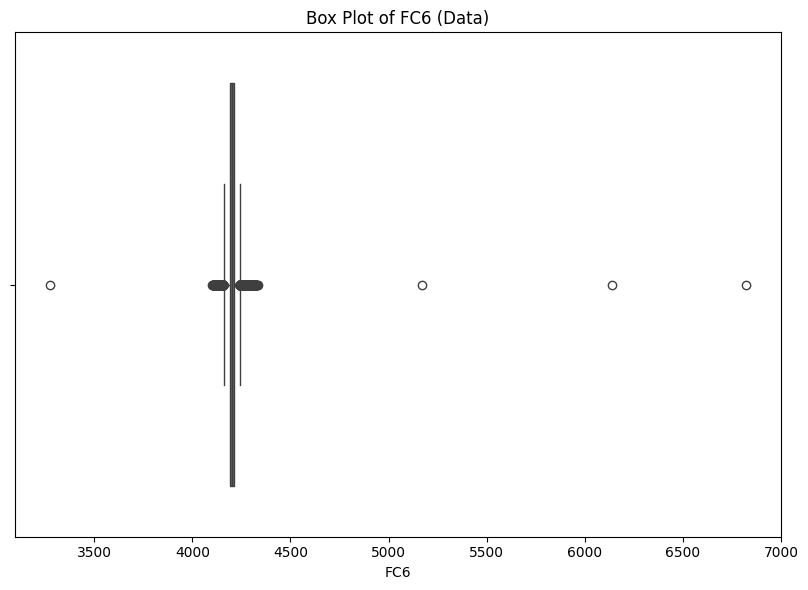

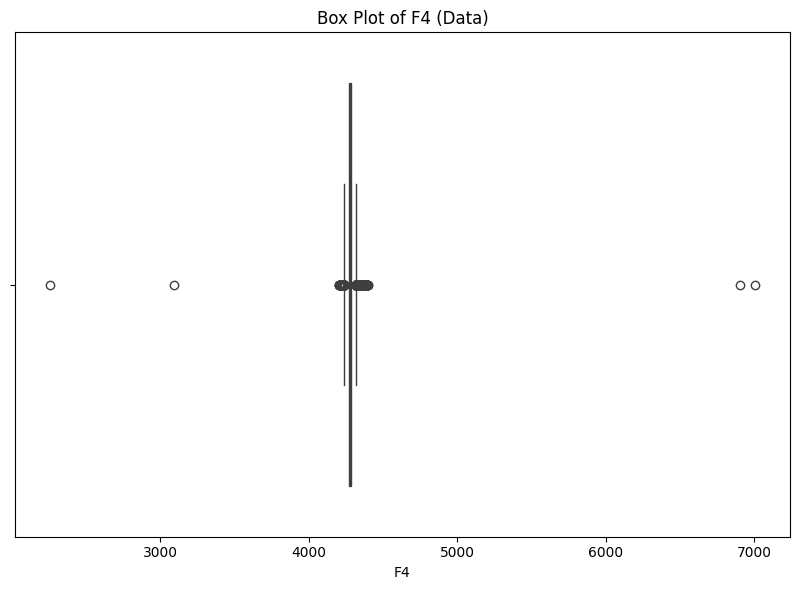

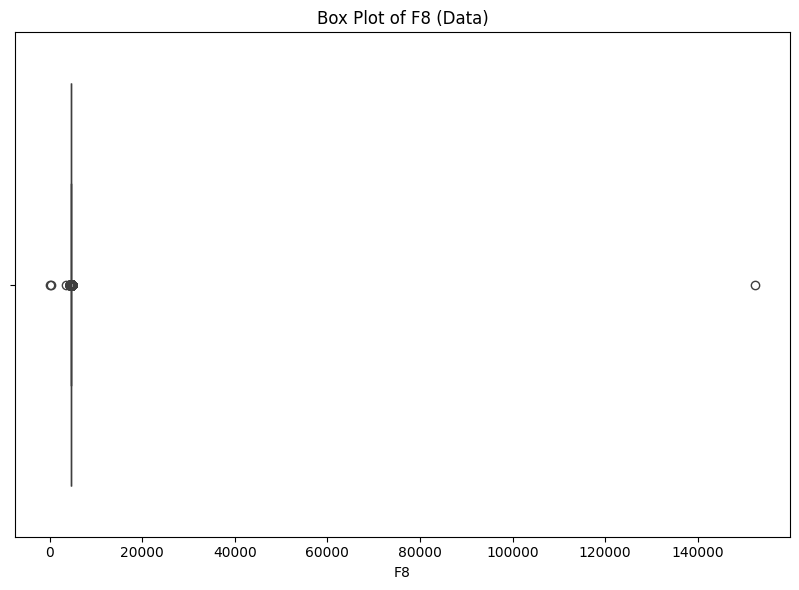

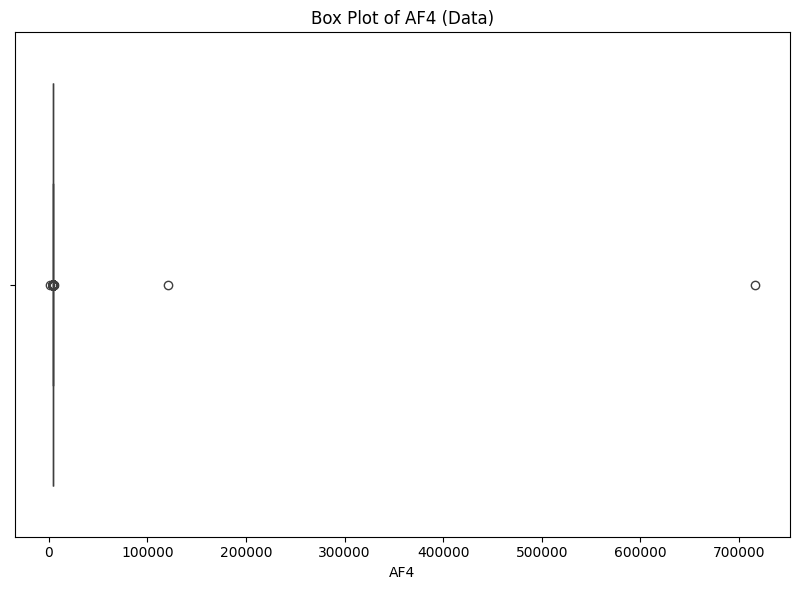

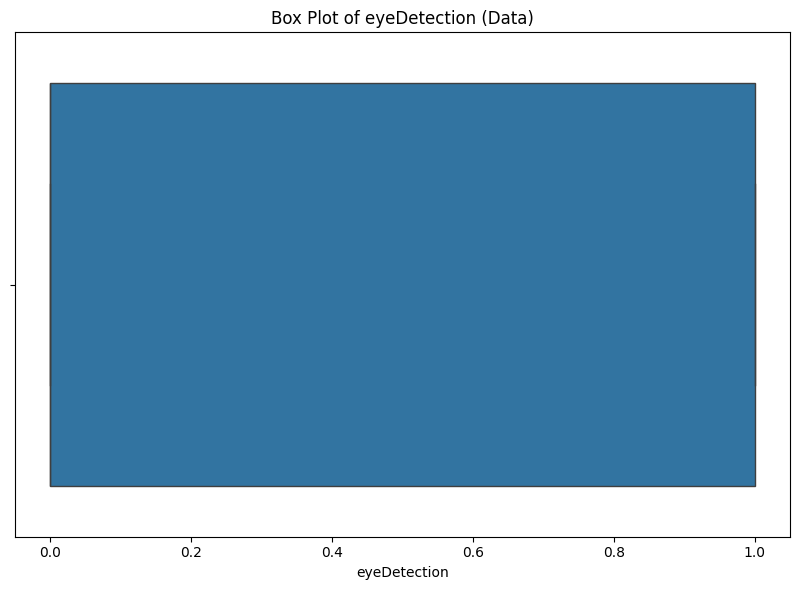

In [14]:
# Visualize each column in the dataset
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(16, 6))

# Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f"Box Plot of {column} (Data)")
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

In [15]:
# Function to count outliers
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column != 'eyeDetection':  # Exclude the target column
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outlier_counts[column] = len(outliers)
    return outlier_counts

In [16]:
count_outliers(data)

{'AF3': 1485,
 'F7': 710,
 'F3': 825,
 'FC5': 601,
 'T7': 727,
 'P7': 1065,
 'O1': 348,
 'O2': 609,
 'P8': 584,
 'T8': 830,
 'FC6': 1063,
 'F4': 838,
 'F8': 1460,
 'AF4': 1592}

In [17]:
data.skew()

,0
AF3,122.293865
F7,39.046558
F3,-13.615161
FC5,122.387777
T7,7.561902
P7,122.362811
O1,122.383593
O2,51.097219
P8,122.334671
T8,10.230701



Feature	Skewness Value	Interpretation

AF3	122.29	Highly positively skewed

F7	39.04	Highly positively skewed

F3	-13.61	Highly negatively skewed

FC5	122.38	Highly positively skewed

T7	7.56	Moderately positively skewed

P7	122.36	Highly positively skewed

O1	122.38	Highly positively skewed

O2	51.09	Highly positively skewed

P8	122.33	Highly positively skewed

T8	10.23	Moderately positively skewed

FC6	31.64	Highly positively skewed

F4	26.56	Highly positively skewed

F8	121.91	Highly positively skewed

AF4	118.13	Highly positively skewed

eyeDetection	0.2059	Approximately symmetrical (low skewness)

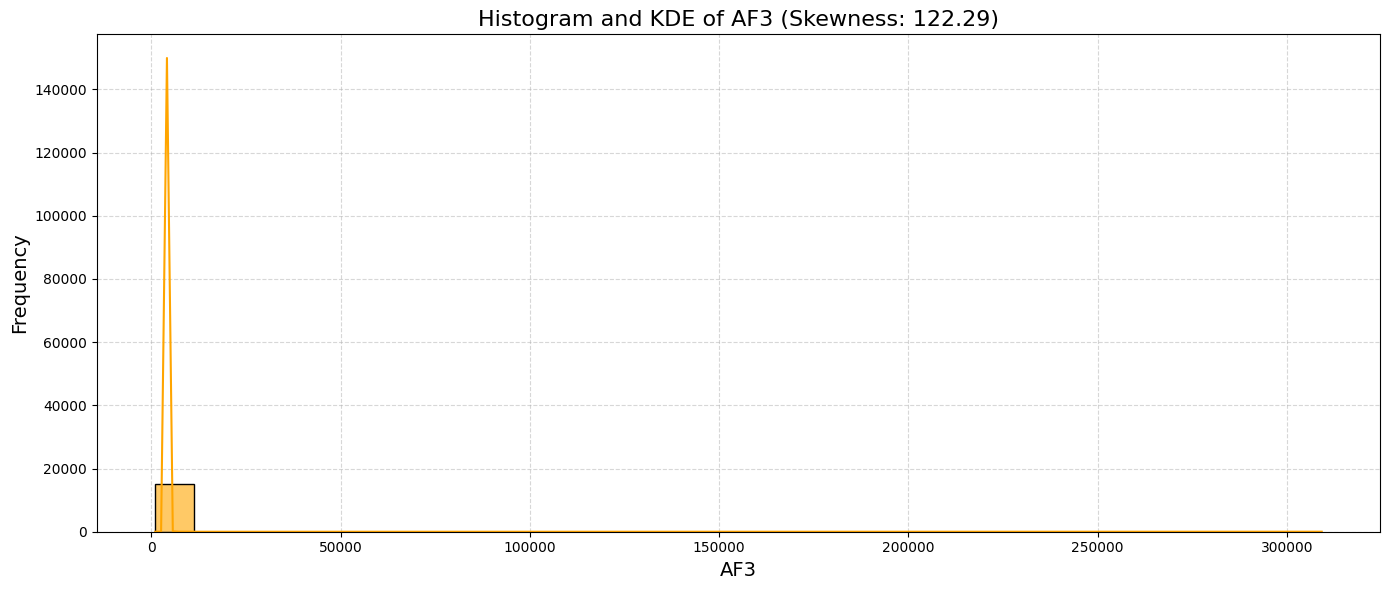

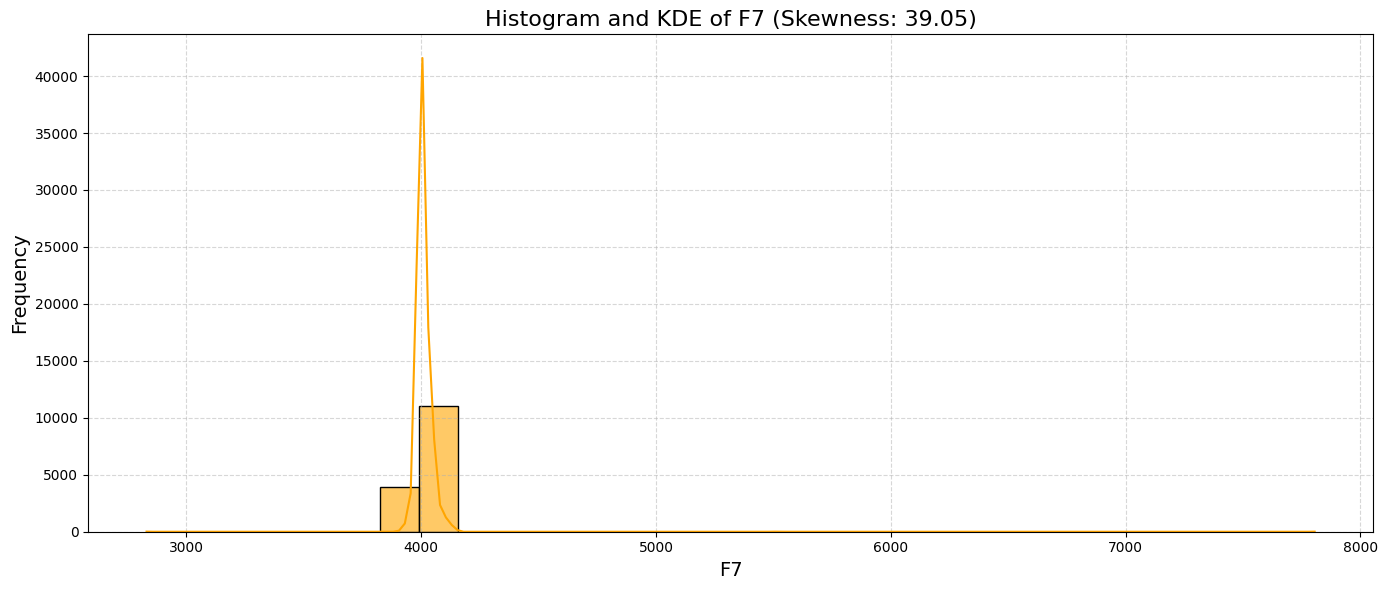

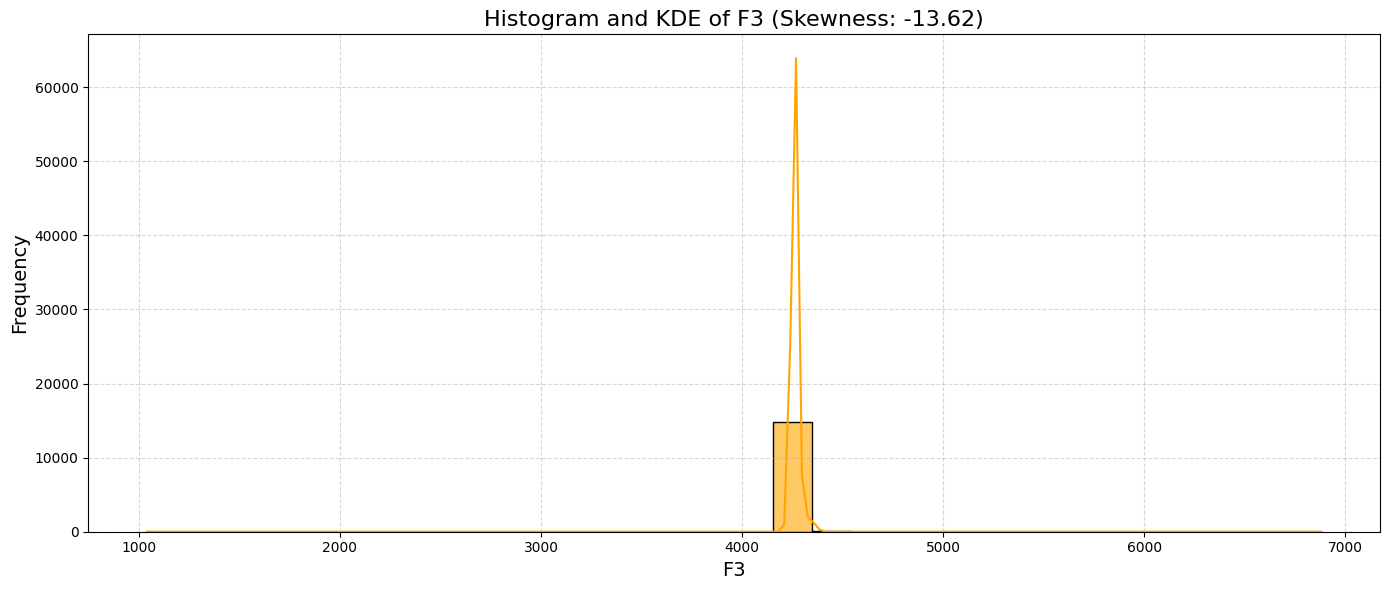

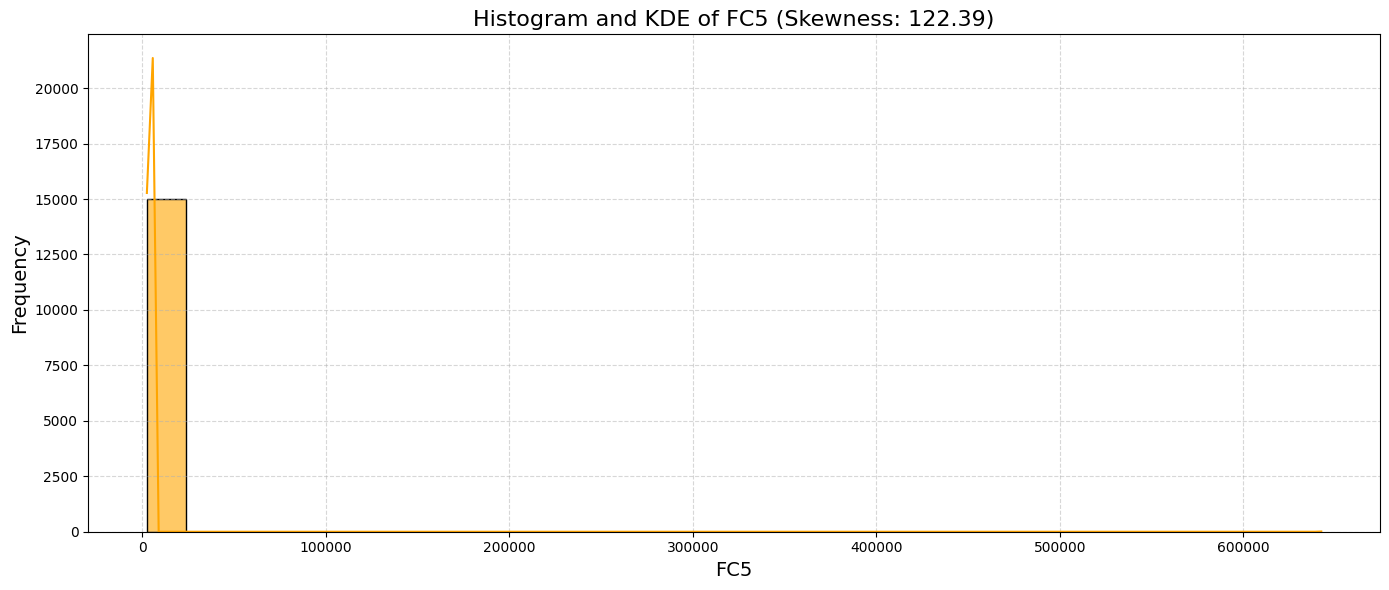

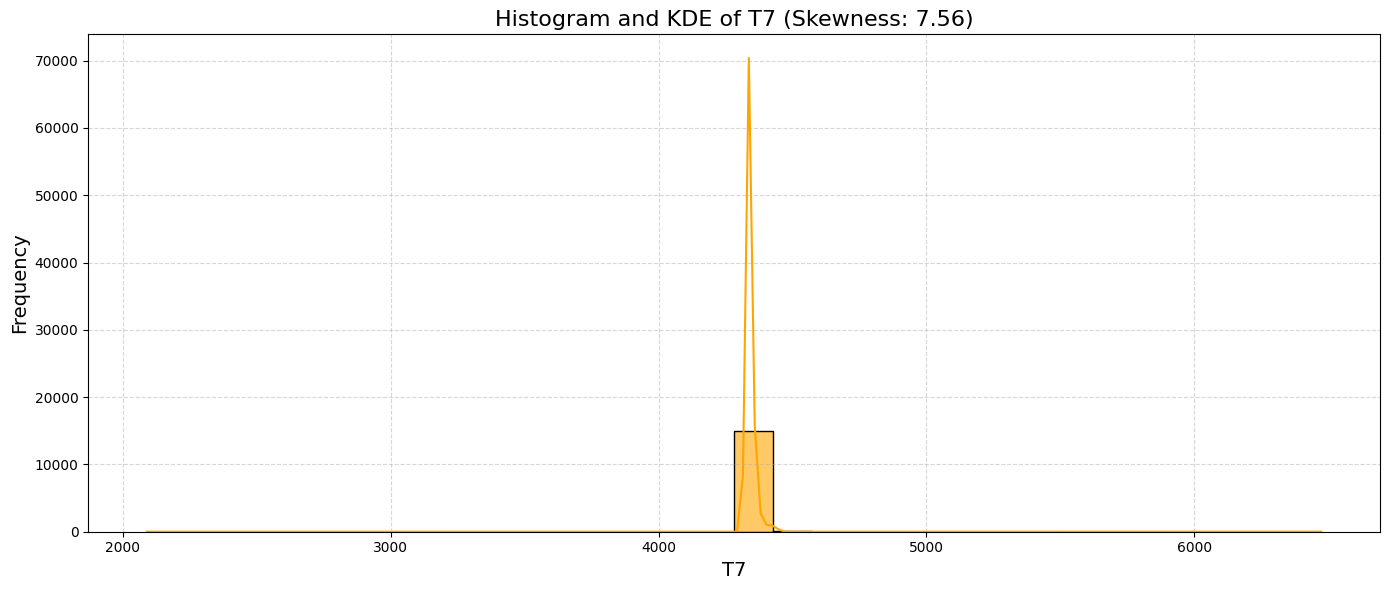

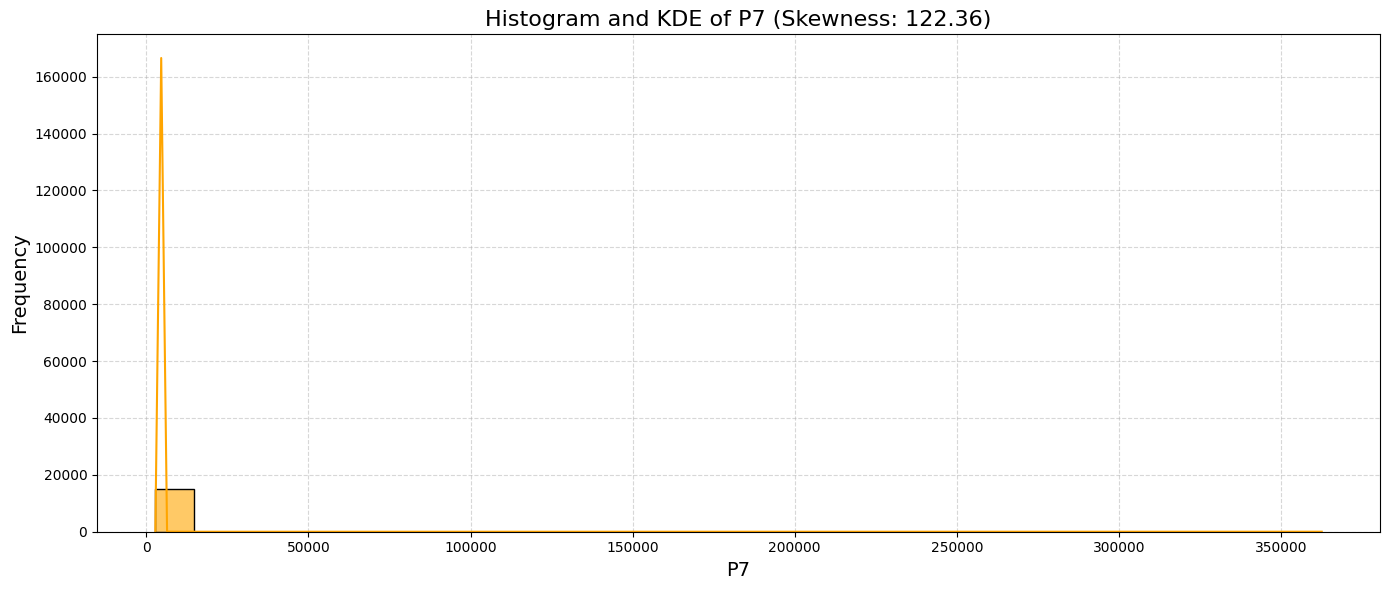

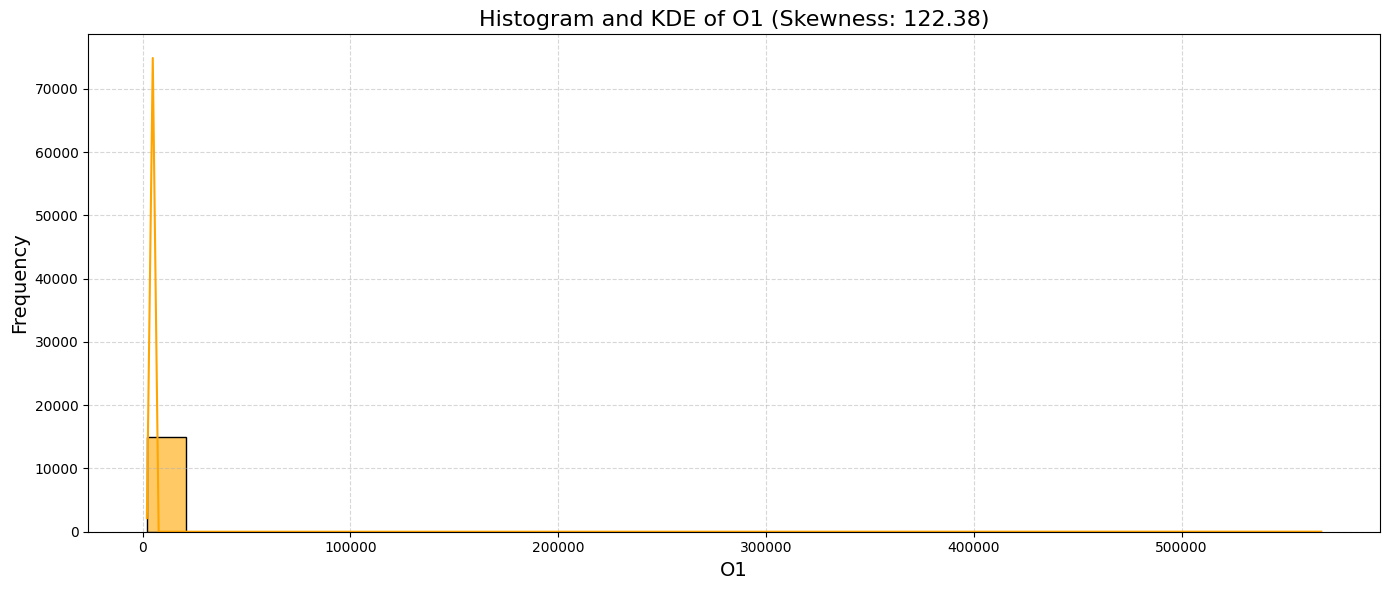

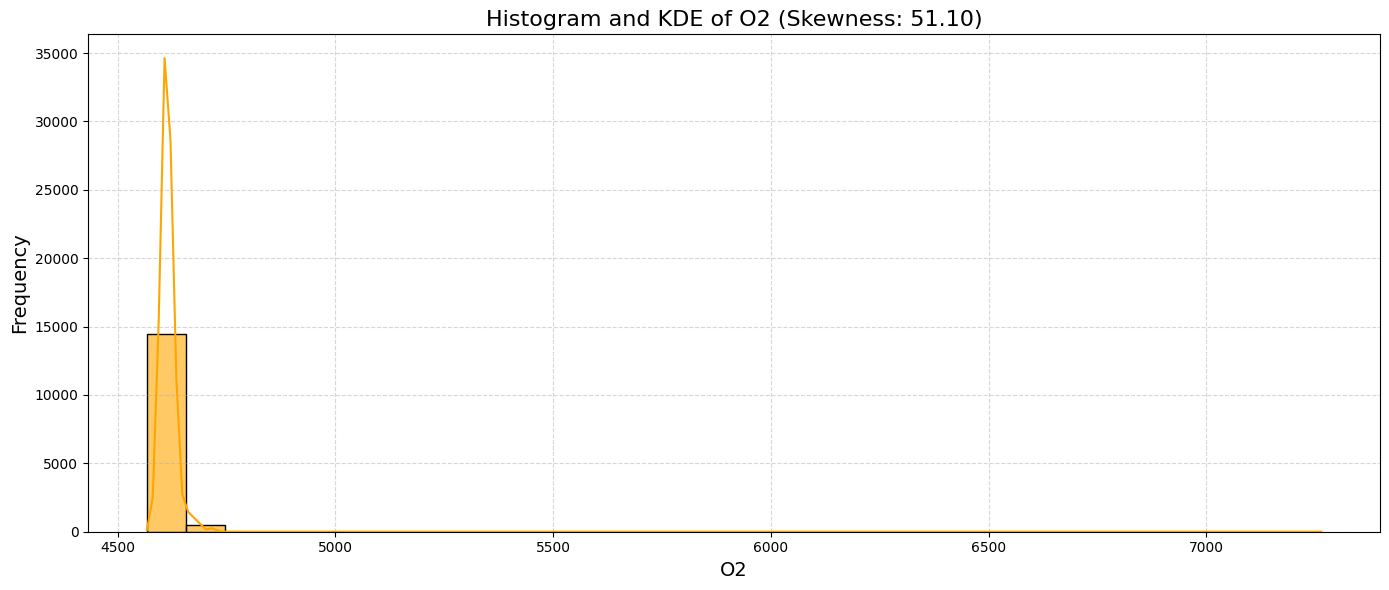

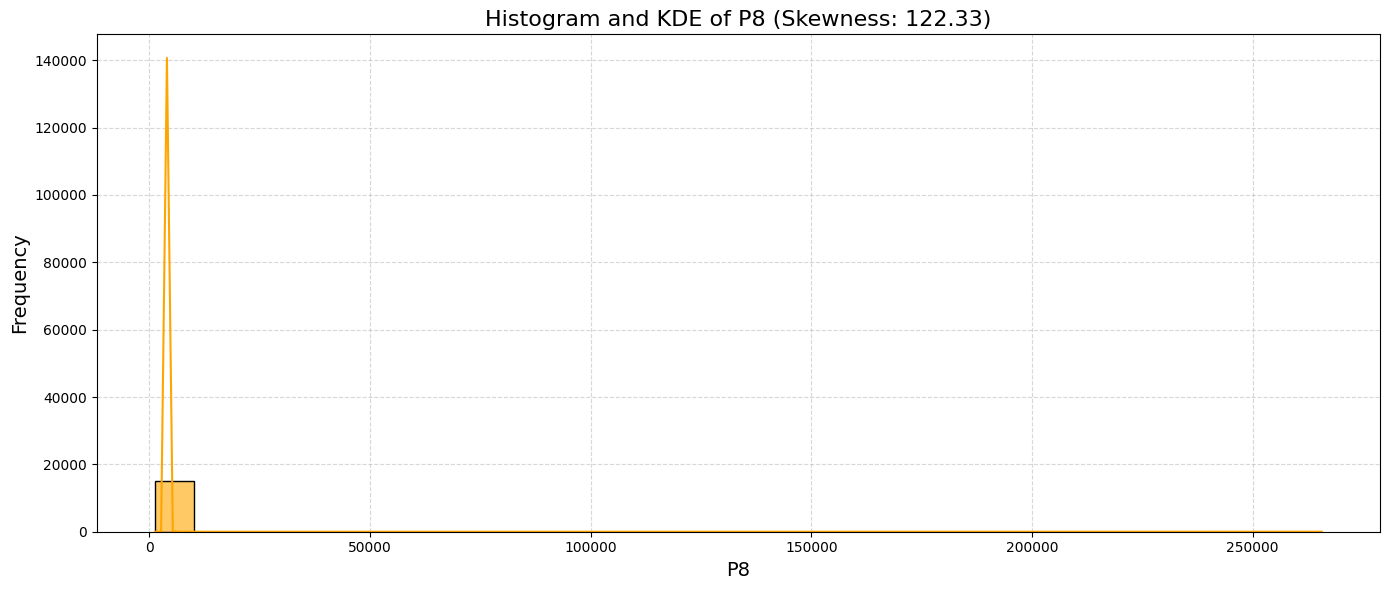

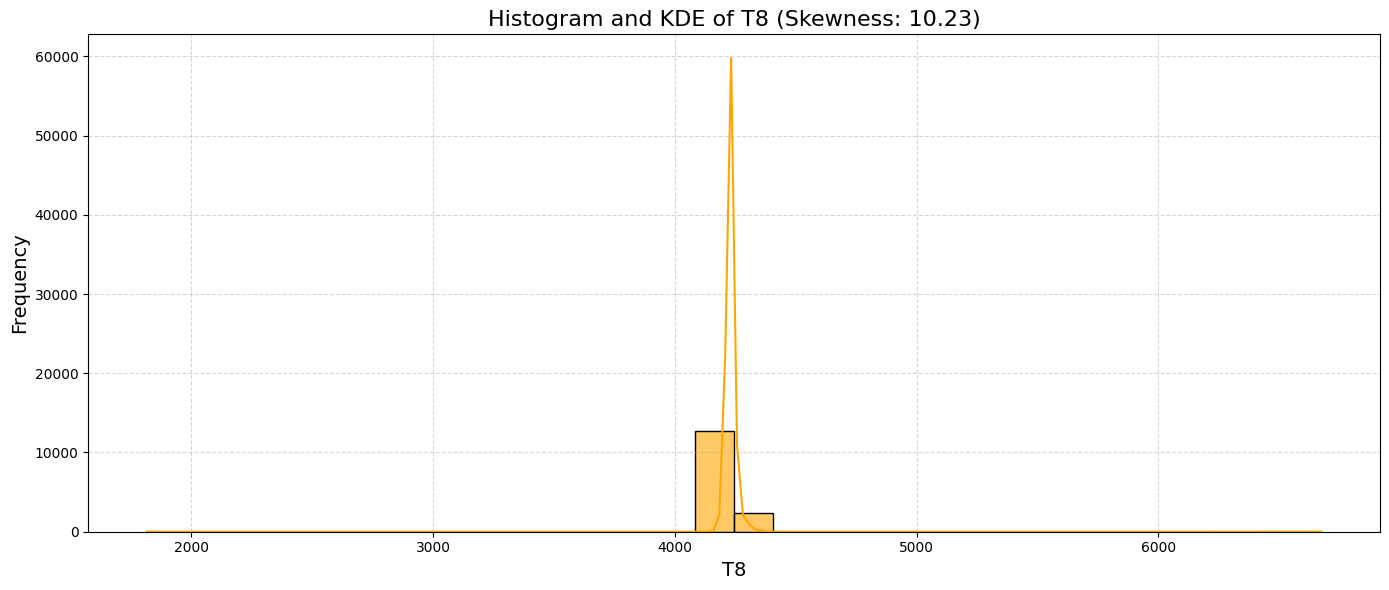

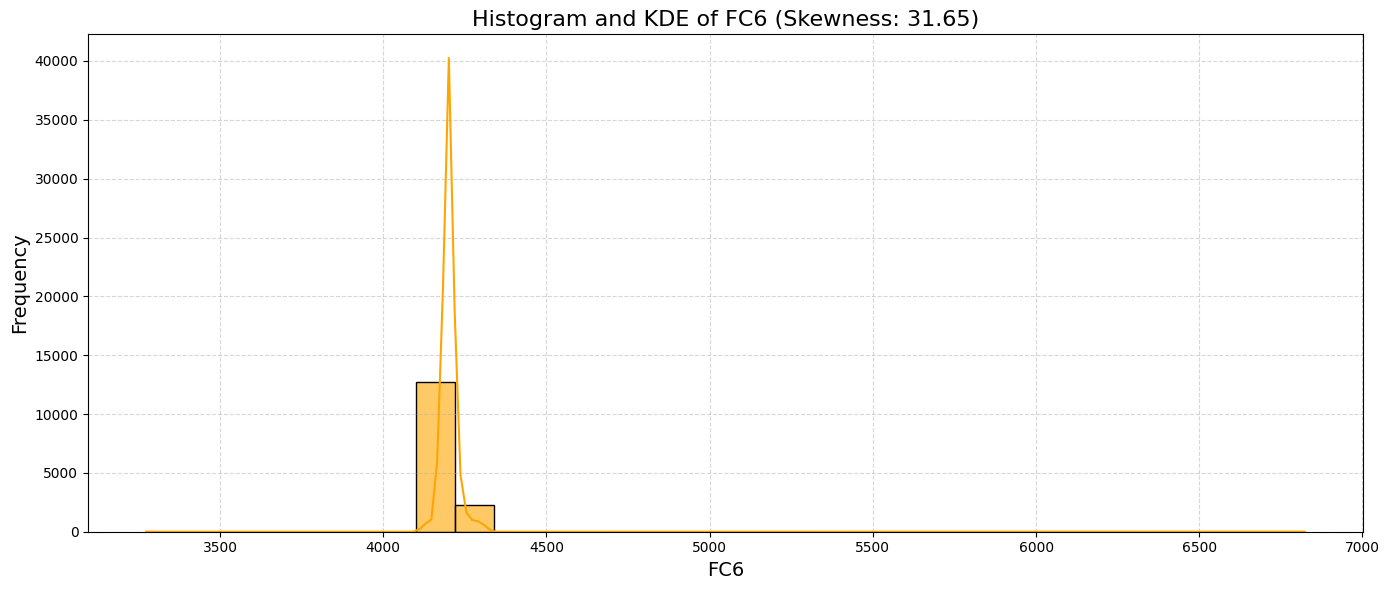

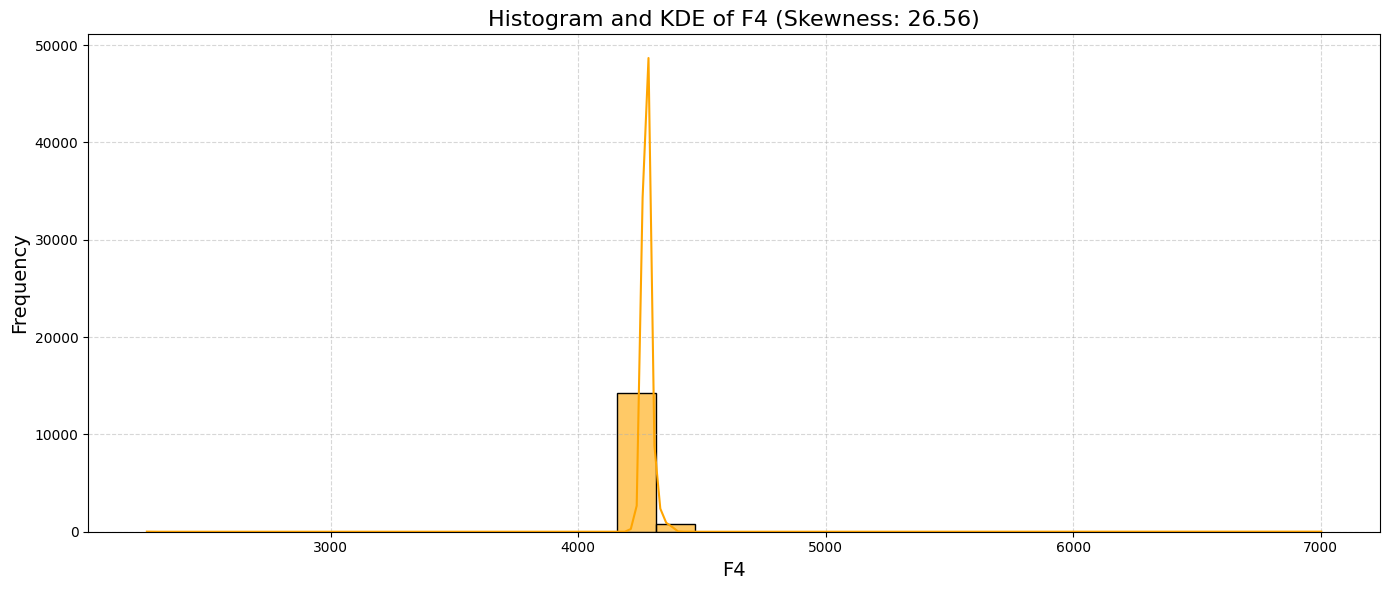

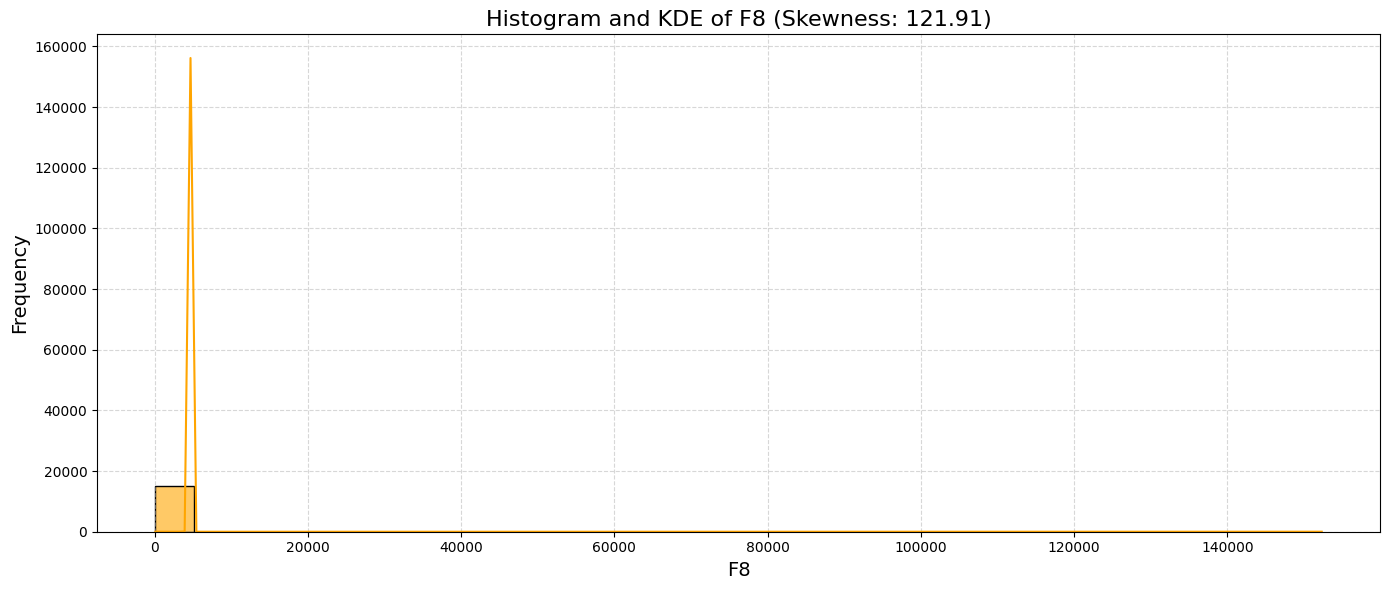

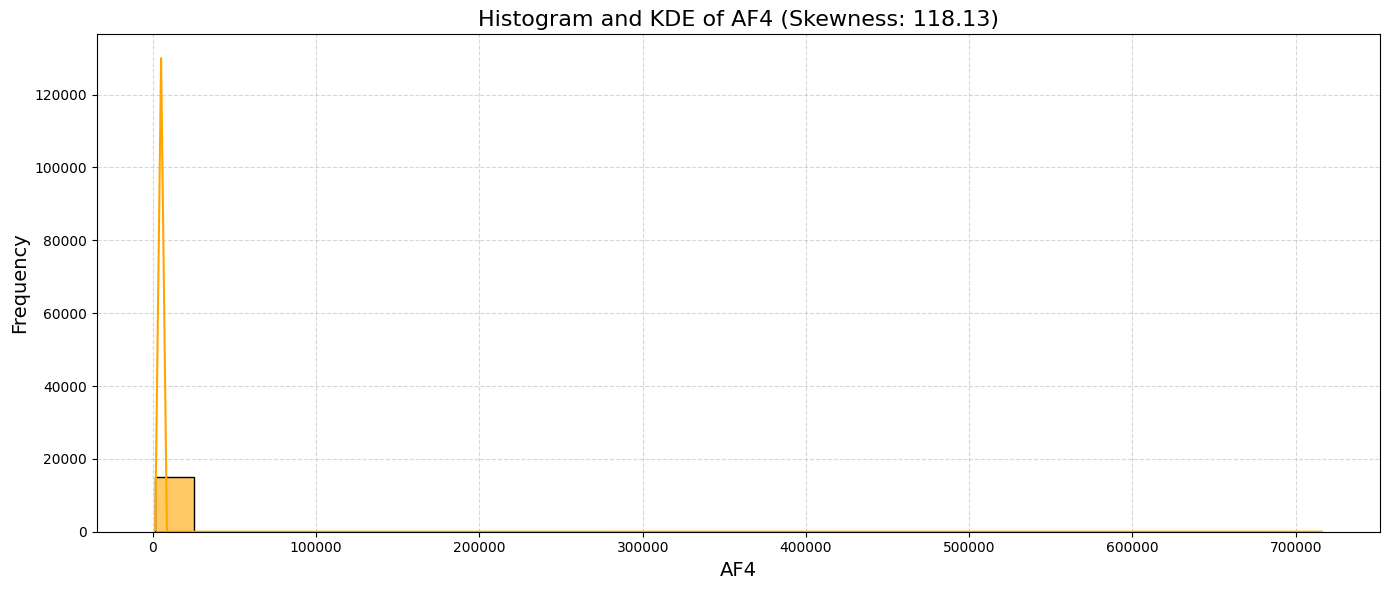

In [18]:
# Plot histograms and KDE plots for each feature
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'eyeDetection':  # Exclude the target column
        plt.figure(figsize=(14, 6))

        # Histogram with KDE plot
        sns.histplot(data[column], kde=True, bins=30, color='orange', alpha=0.6)
        plt.title(f"Histogram and KDE of {column} (Skewness: {data[column].skew():.2f})", fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()


In [19]:
# Calculate IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of Outliers Detected (IQR): {outliers_iqr.sum()}")

# Remove IQR outliers
data_iqr_cleaned = data[~outliers_iqr]
print(f"Shape after removing IQR outliers: {data_iqr_cleaned.shape}")


Number of Outliers Detected (IQR): 3127
Shape after removing IQR outliers: (11853, 15)


In [20]:
count_outliers(data_iqr_cleaned)

{'AF3': 295,
 'F7': 130,
 'F3': 122,
 'FC5': 207,
 'T7': 42,
 'P7': 150,
 'O1': 73,
 'O2': 29,
 'P8': 79,
 'T8': 105,
 'FC6': 100,
 'F4': 60,
 'F8': 192,
 'AF4': 184}

Even after applying the IQR method to remove outliers, the data is contain outliers still.

In [21]:
data_iqr_cleaned.skew()

,0
AF3,0.432719
F7,0.321761
F3,-0.024348
FC5,0.213773
T7,0.150833
P7,-0.117918
O1,0.382267
O2,0.037336
P8,0.033074
T8,0.031850


To handle  the remainig outliers, the  Winsorization capping method applied .

In [22]:
# Function to cap outliers using IQR thresholds
def cap_outliers(df):
    df_capped = df.copy()

    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column != 'eyeDetection':  # Exclude the target column
            Q1 = df_capped[column].quantile(0.25)
            Q3 = df_capped[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap values outside bounds
            df_capped[column] = np.where(df_capped[column] < lower_bound, lower_bound,
                                         np.where(df_capped[column] > upper_bound, upper_bound, df_capped[column]))

    return df_capped

# Apply Winsorization
data_capped = cap_outliers(data_iqr_cleaned)

# Verify remaining outliers after capping
remaining_outliers_capped = cap_outliers(data_capped)
print("Remaining Outliers After Capping:\n", remaining_outliers_capped)


Remaining Outliers After Capping:
            AF3       F7       F3      FC5       T7        P7       O1  \
49     4316.41  4013.85  4267.69  4124.62  4342.56  4594.355  4089.23   
50     4305.13  4008.72  4259.49  4120.00  4341.03  4595.900  4092.82   
51     4293.33  3994.87  4254.36  4116.41  4337.44  4596.410  4092.31   
52     4297.44  3994.36  4258.46  4118.97  4336.92  4594.360  4096.92   
53     4308.21  4007.18  4268.21  4126.15  4344.62  4595.380  4102.05   
...        ...      ...      ...      ...      ...       ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.360  4074.87   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.380  4073.33   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.380  4072.82   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.410  4080.51   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.410  4088.72   

            O2       P8       T8      FC6       F4       F8      AF4  \
49     4616.41  

In [23]:
count_outliers(remaining_outliers_capped)

{'AF3': 0,
 'F7': 0,
 'F3': 0,
 'FC5': 0,
 'T7': 0,
 'P7': 0,
 'O1': 0,
 'O2': 0,
 'P8': 0,
 'T8': 0,
 'FC6': 0,
 'F4': 0,
 'F8': 0,
 'AF4': 0}

Capping remove remainig all outliers .

In [24]:
remaining_outliers_capped.shape

(11853, 15)

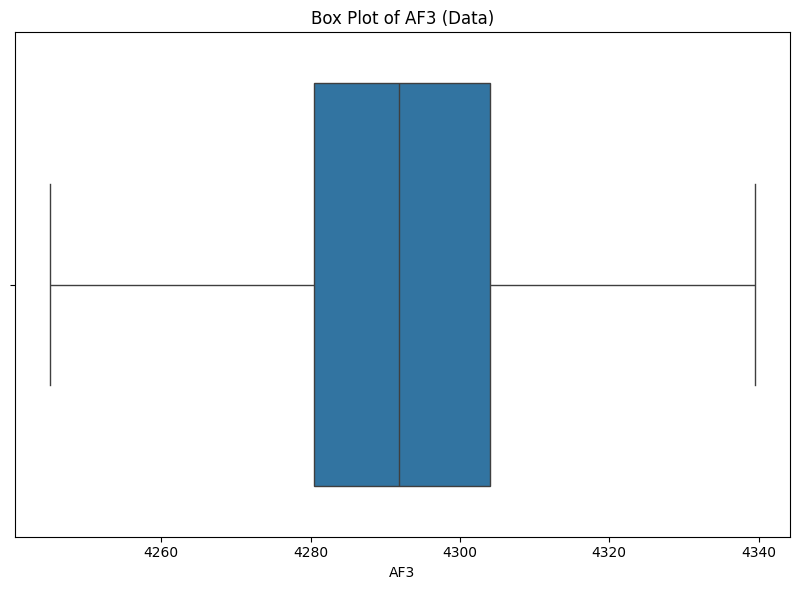

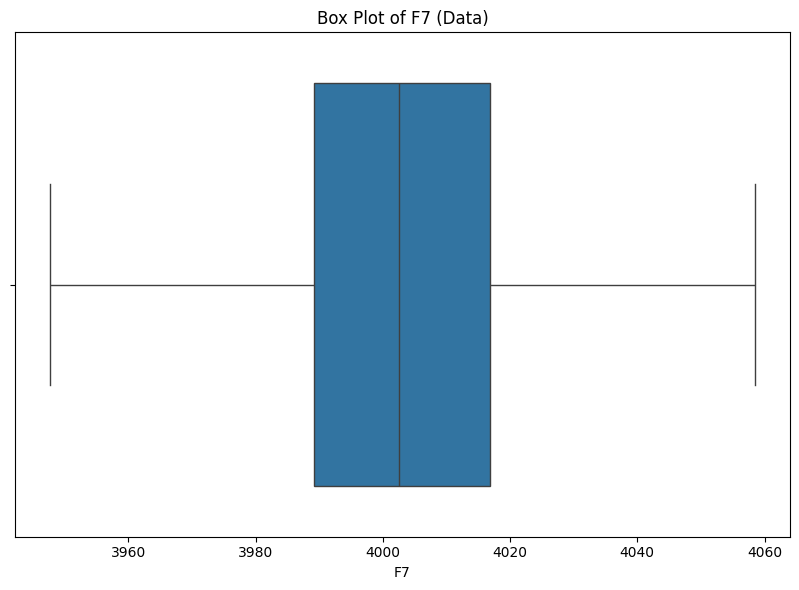

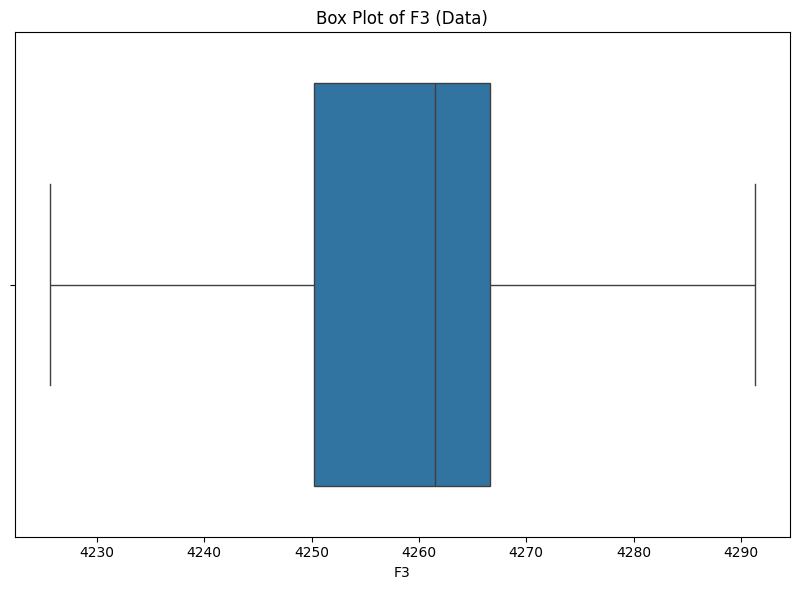

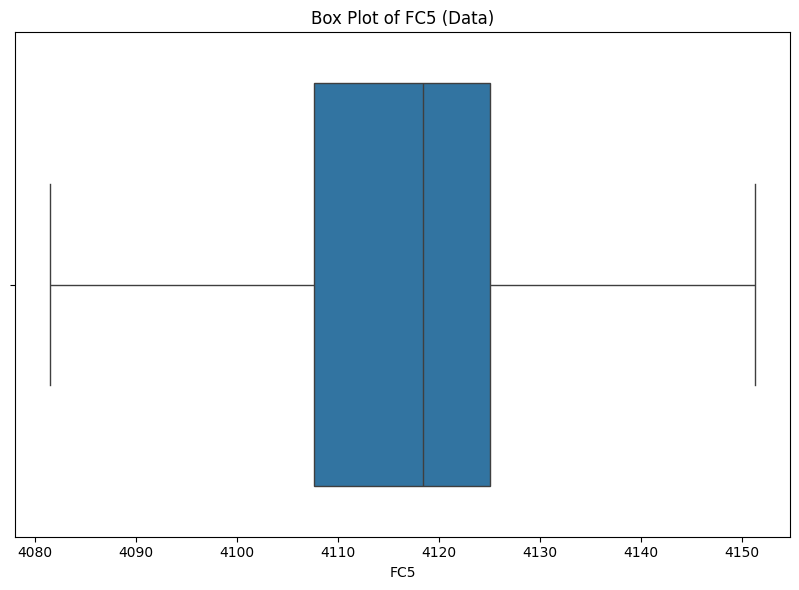

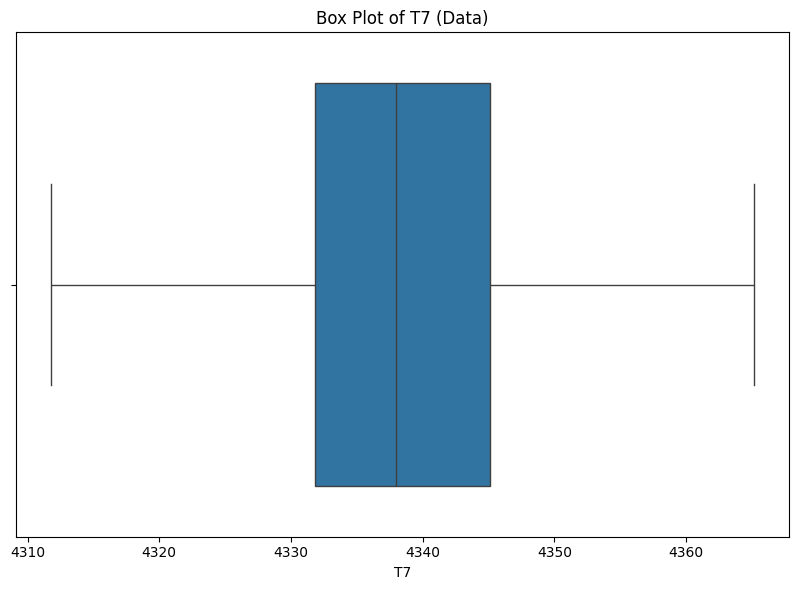

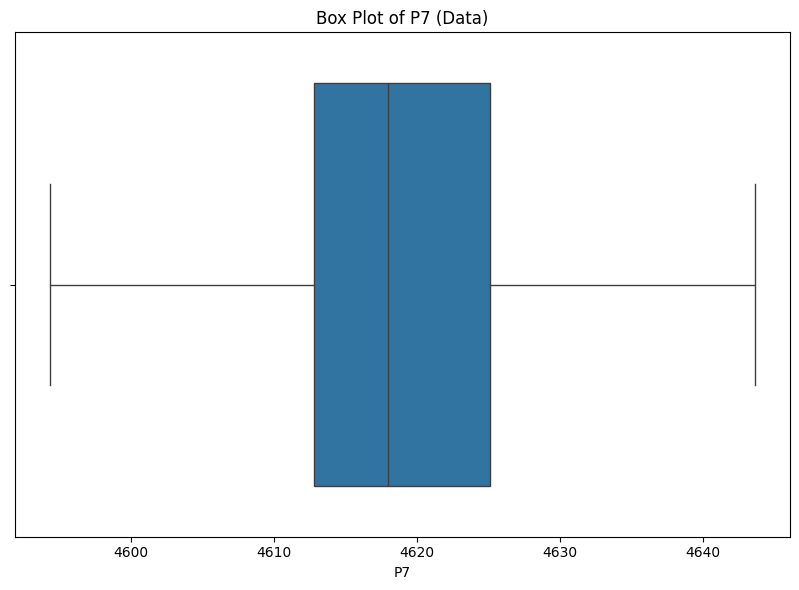

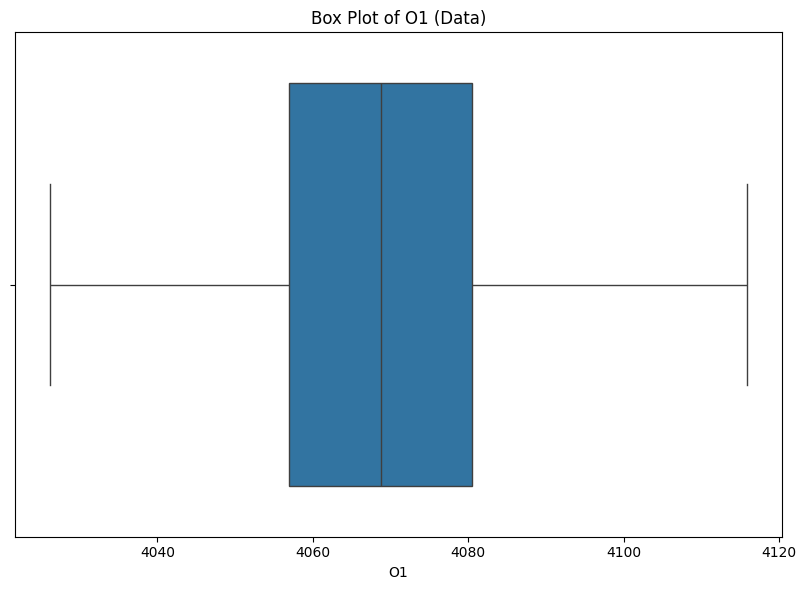

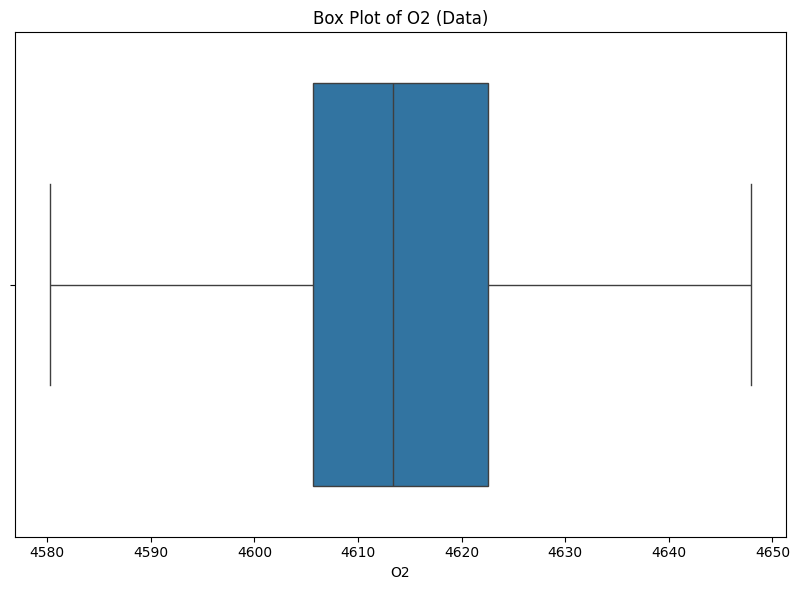

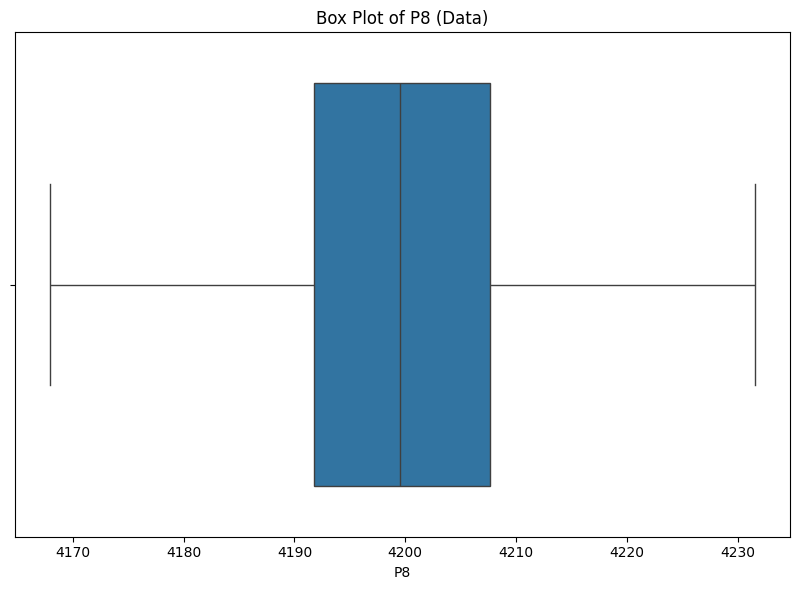

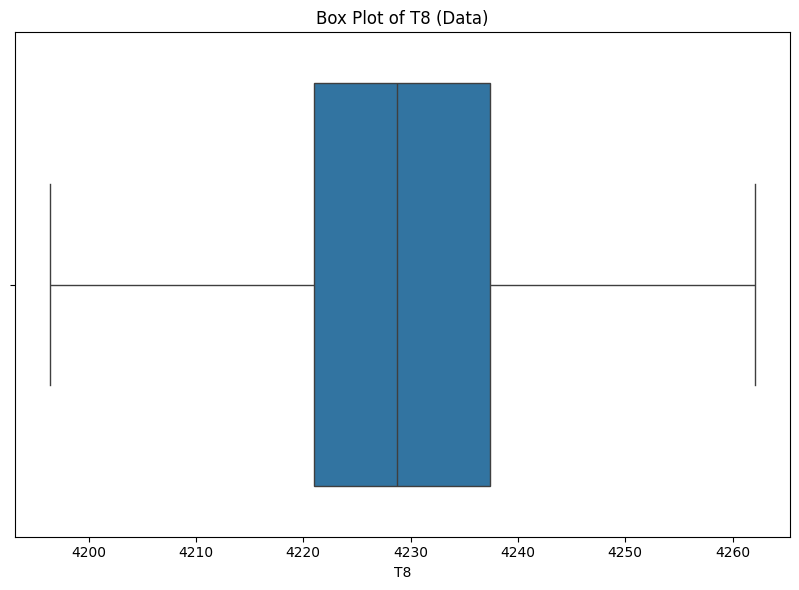

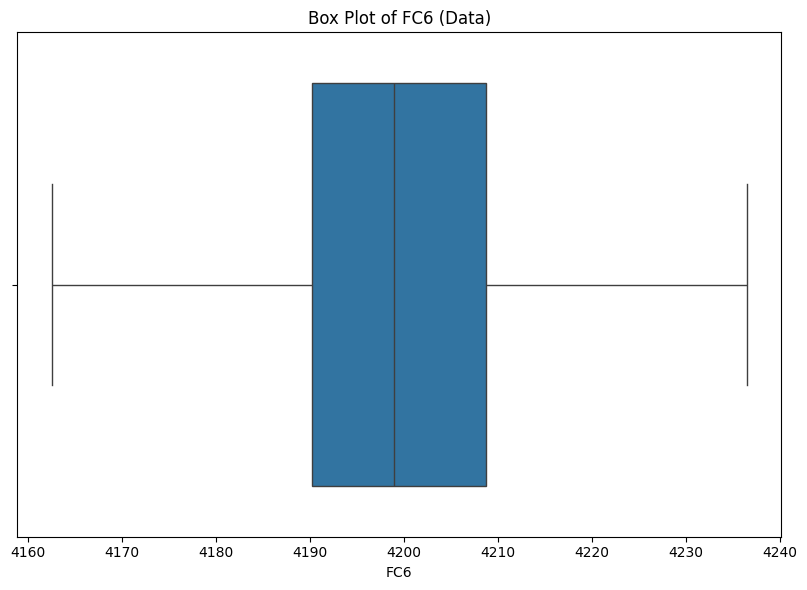

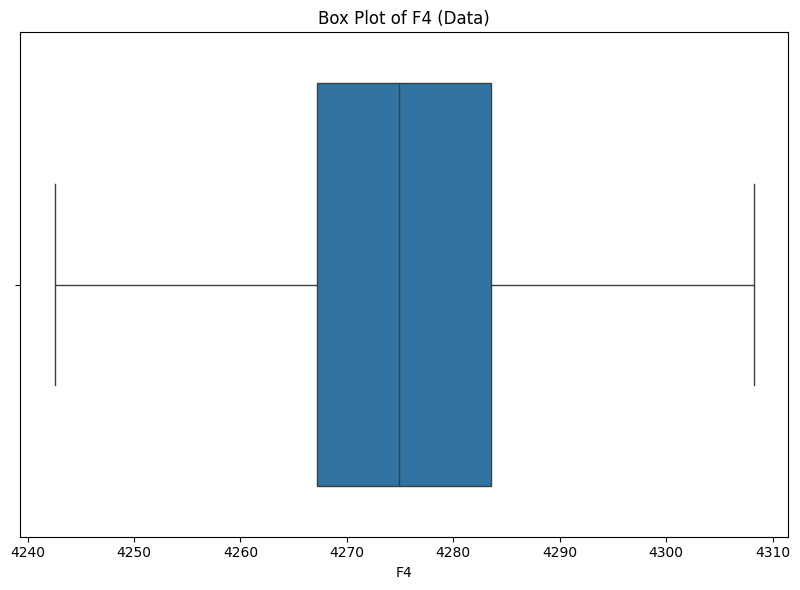

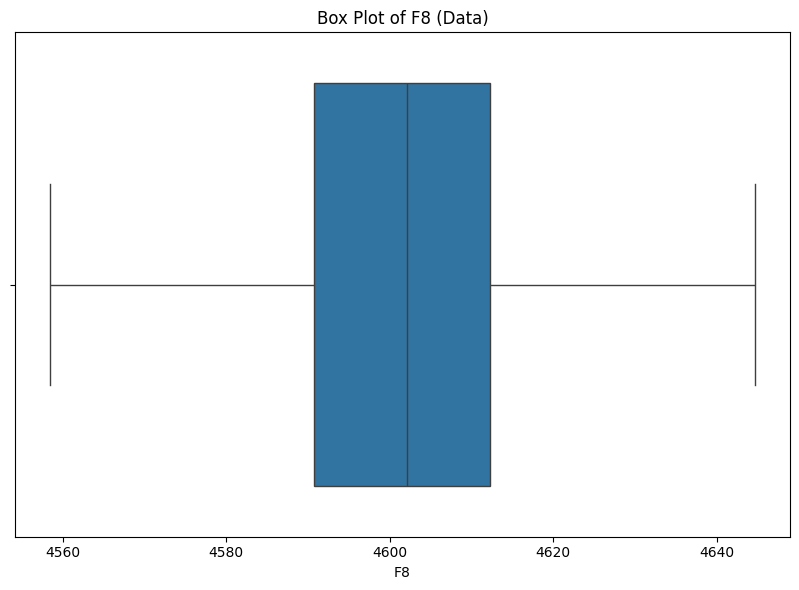

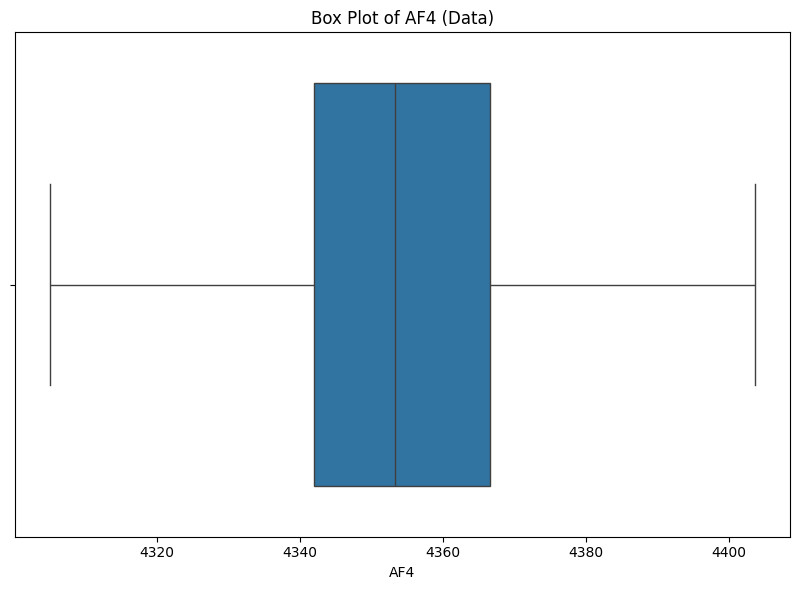

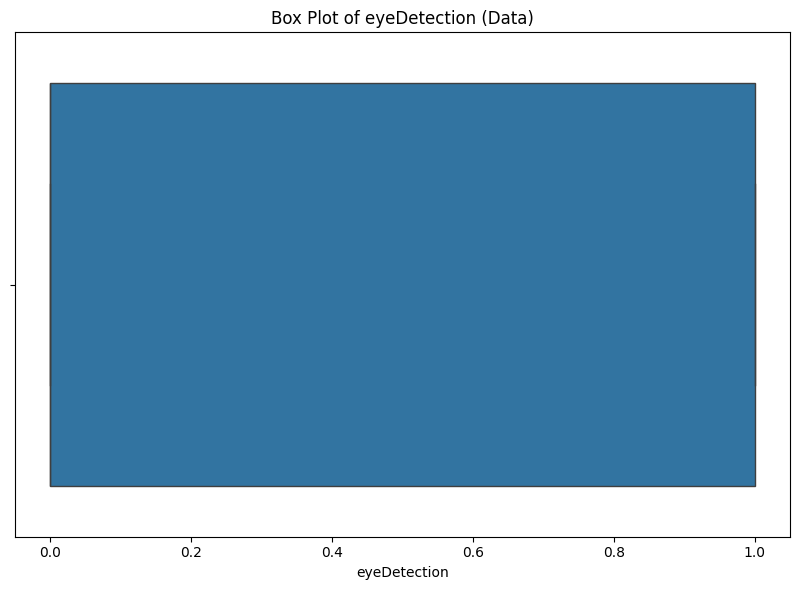

In [25]:
# Visualize each numeric column in the cleaned dataset
for column in remaining_outliers_capped.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(16, 6))

# Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=remaining_outliers_capped[column])
    plt.title(f"Box Plot of {column} (Data)")
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

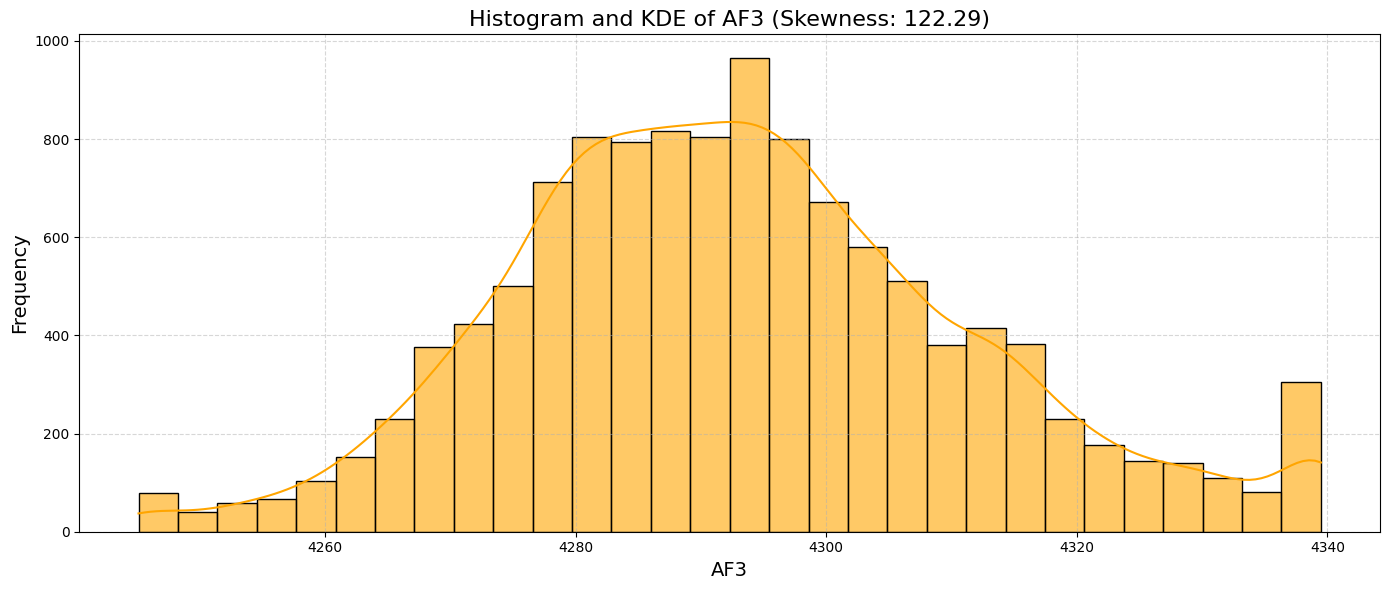

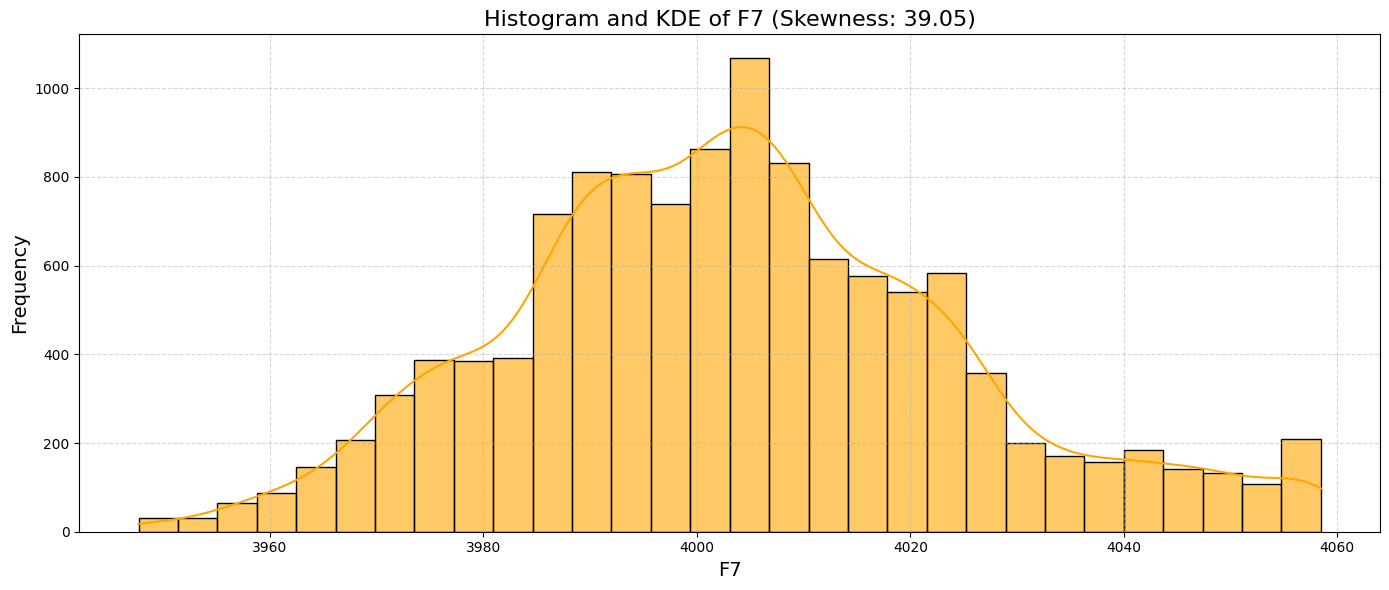

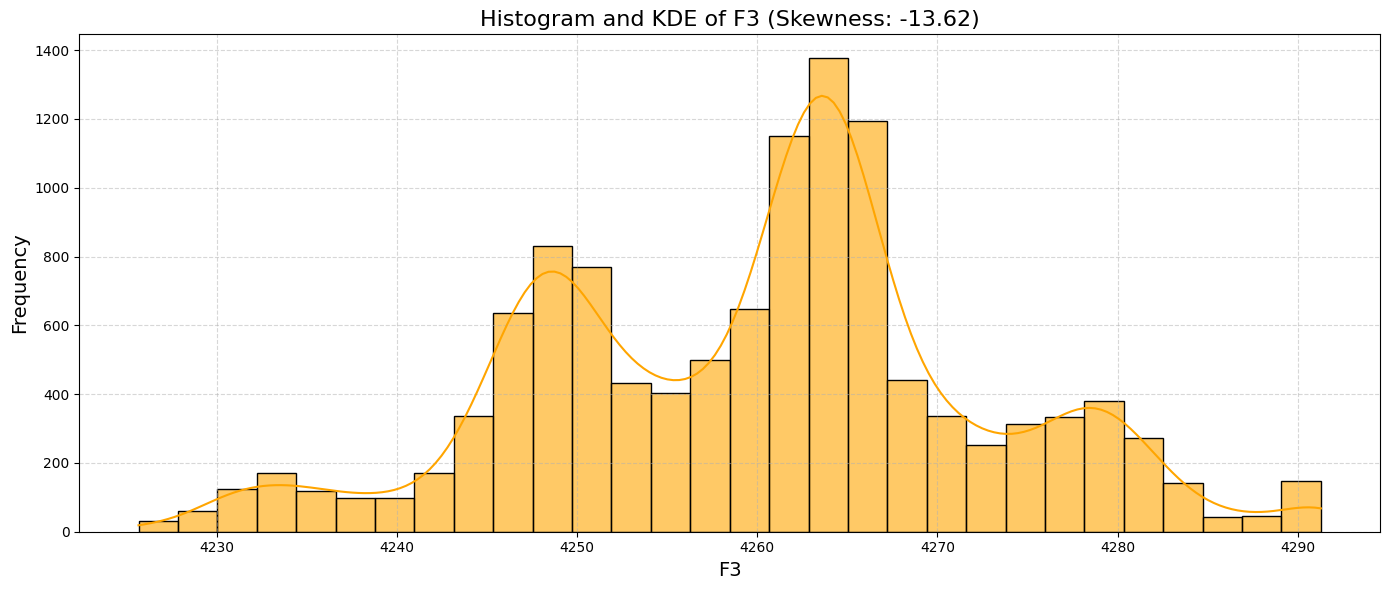

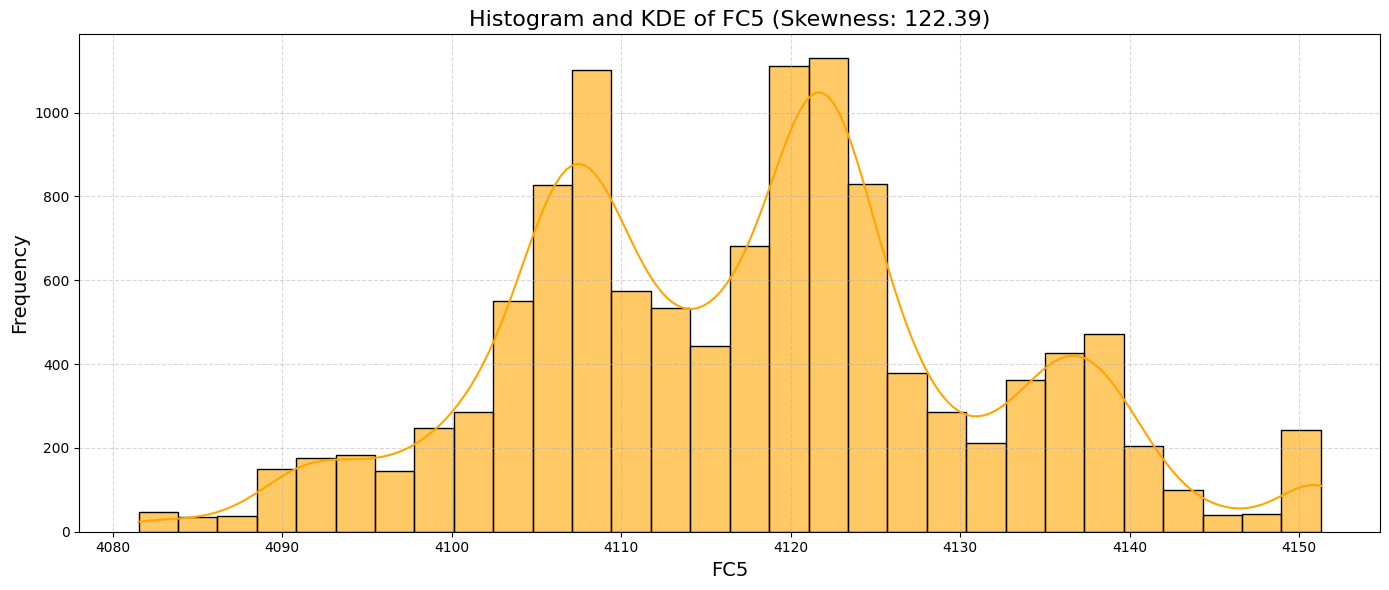

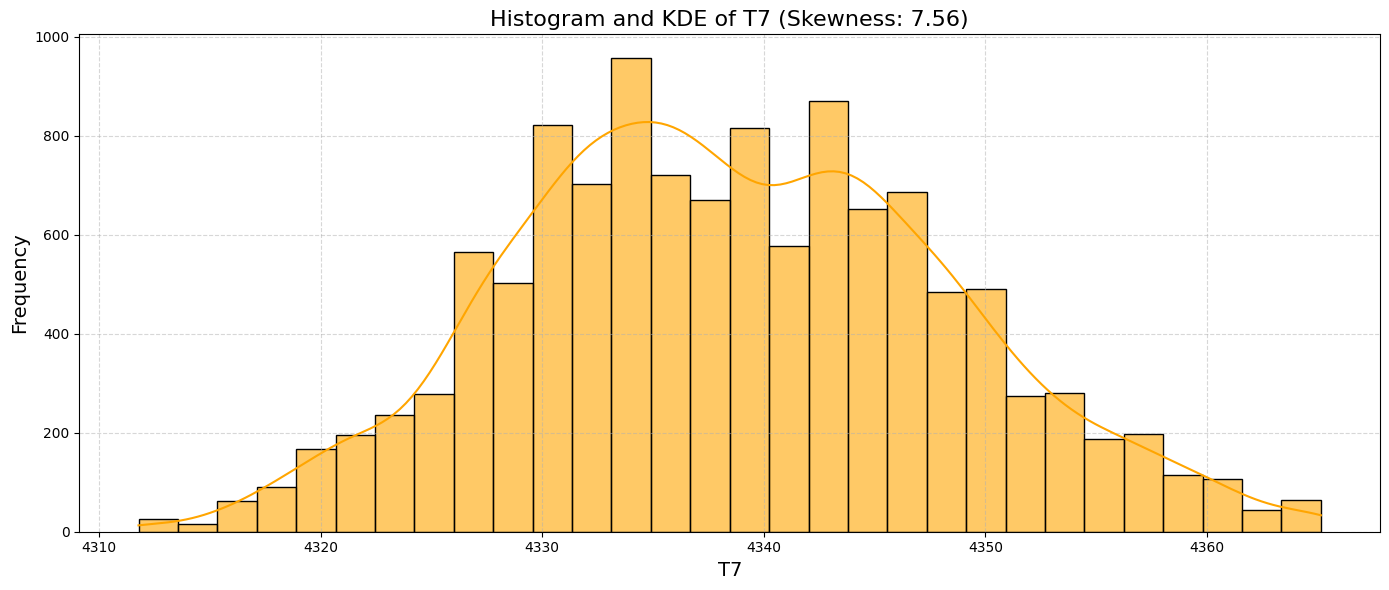

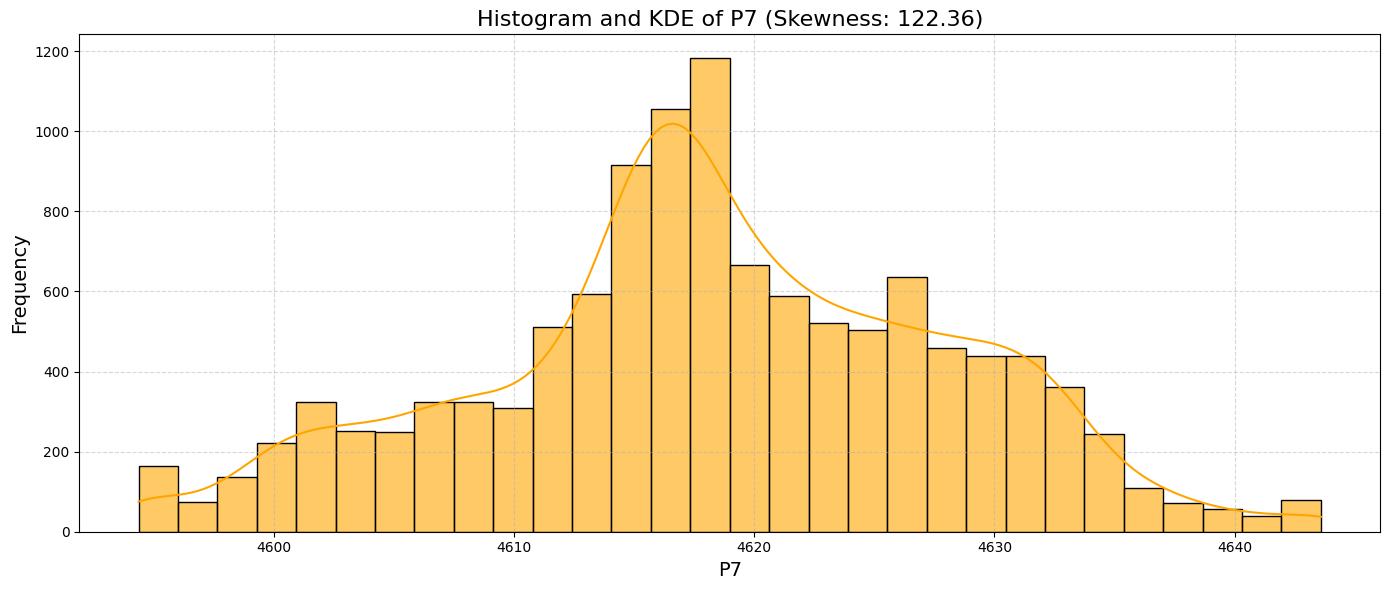

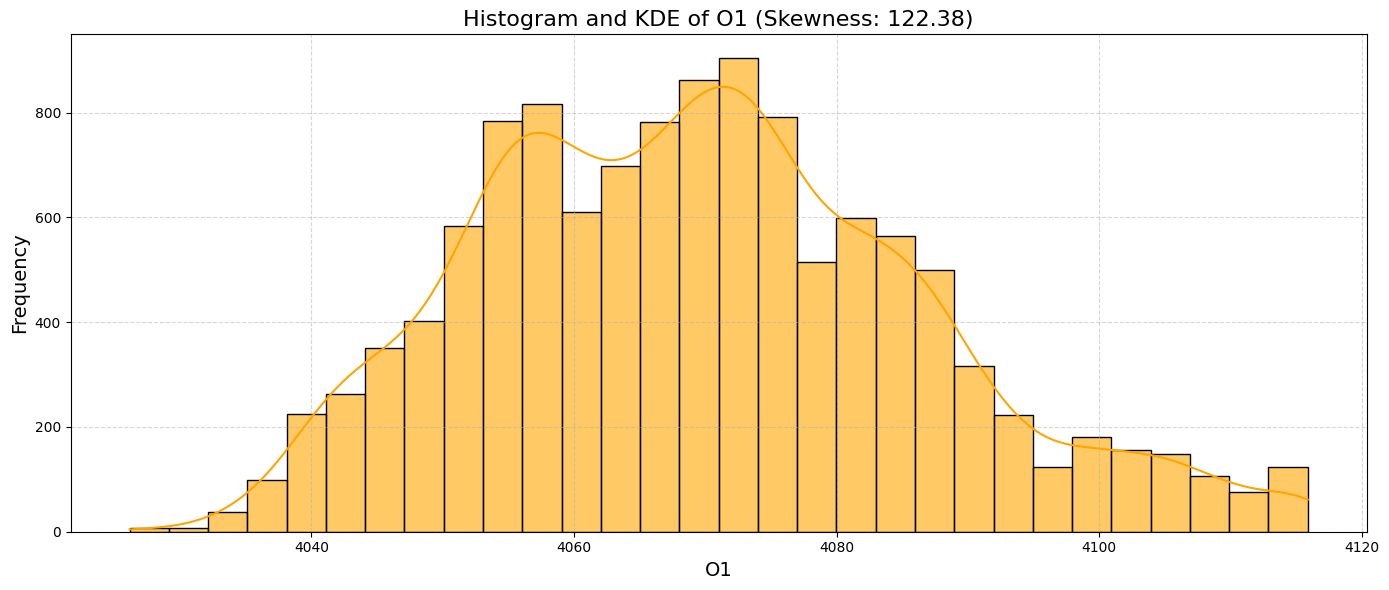

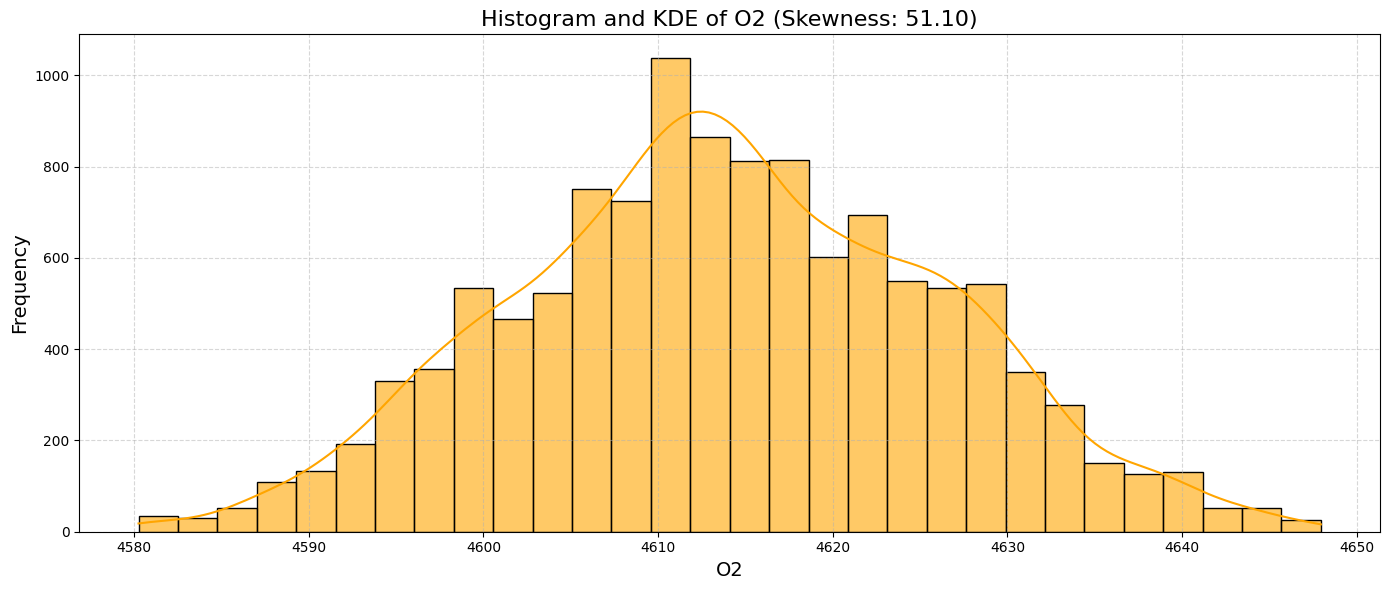

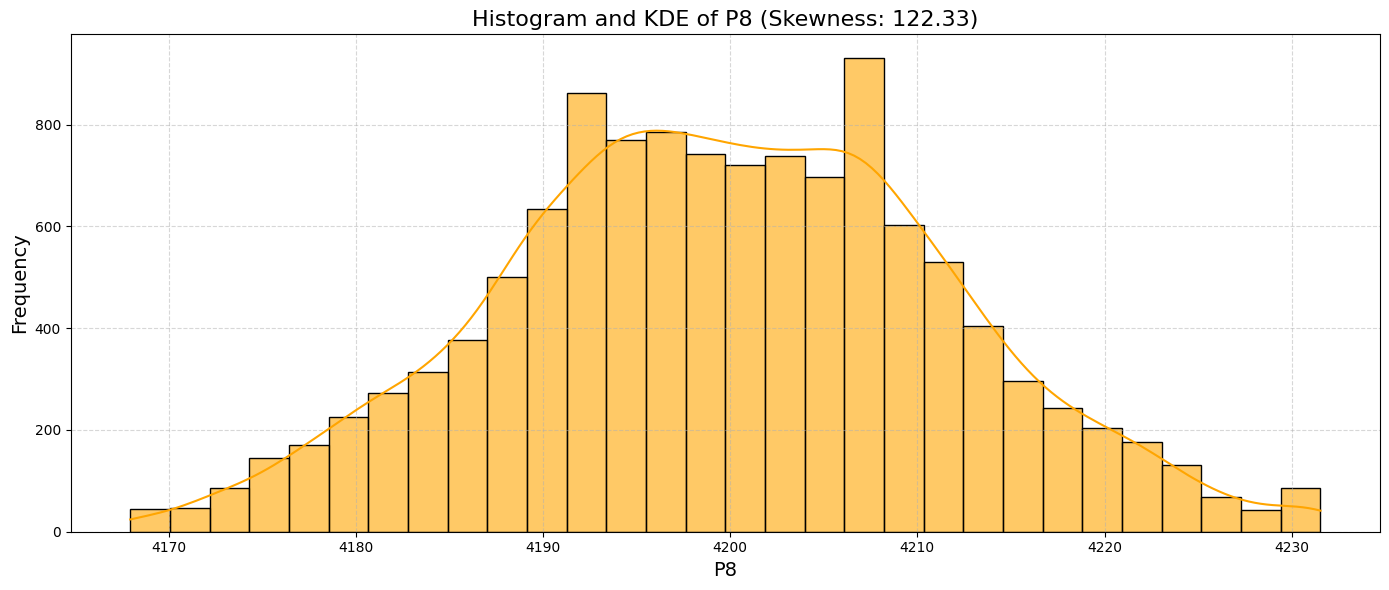

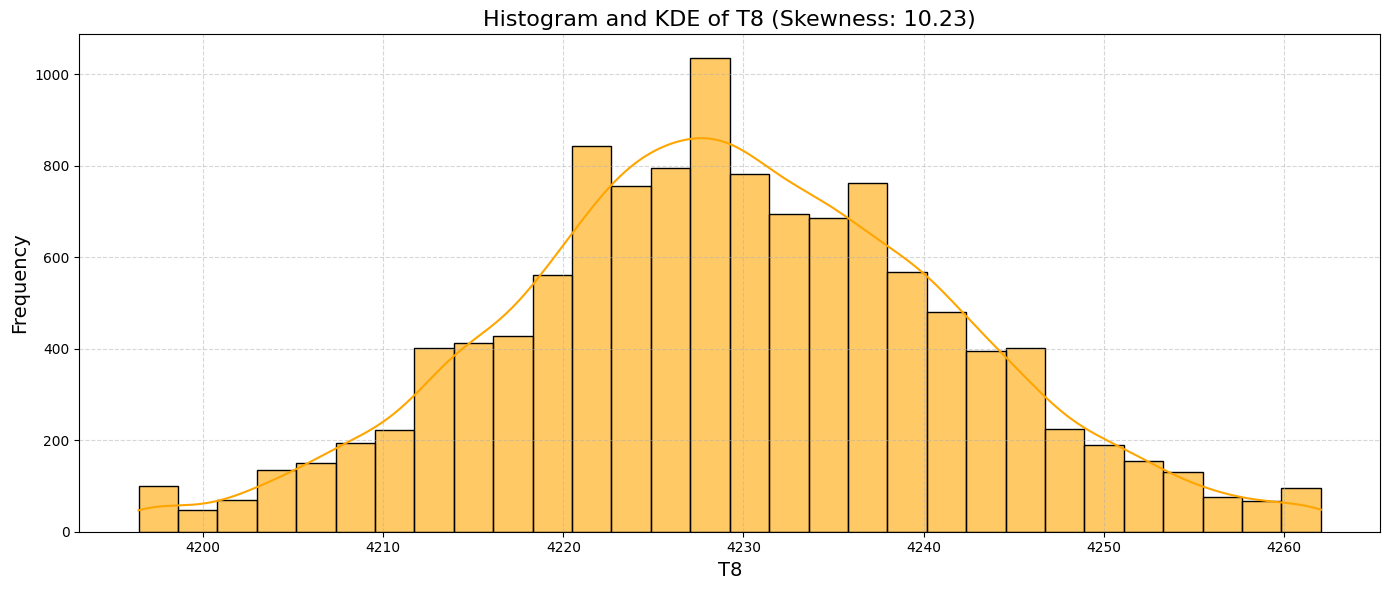

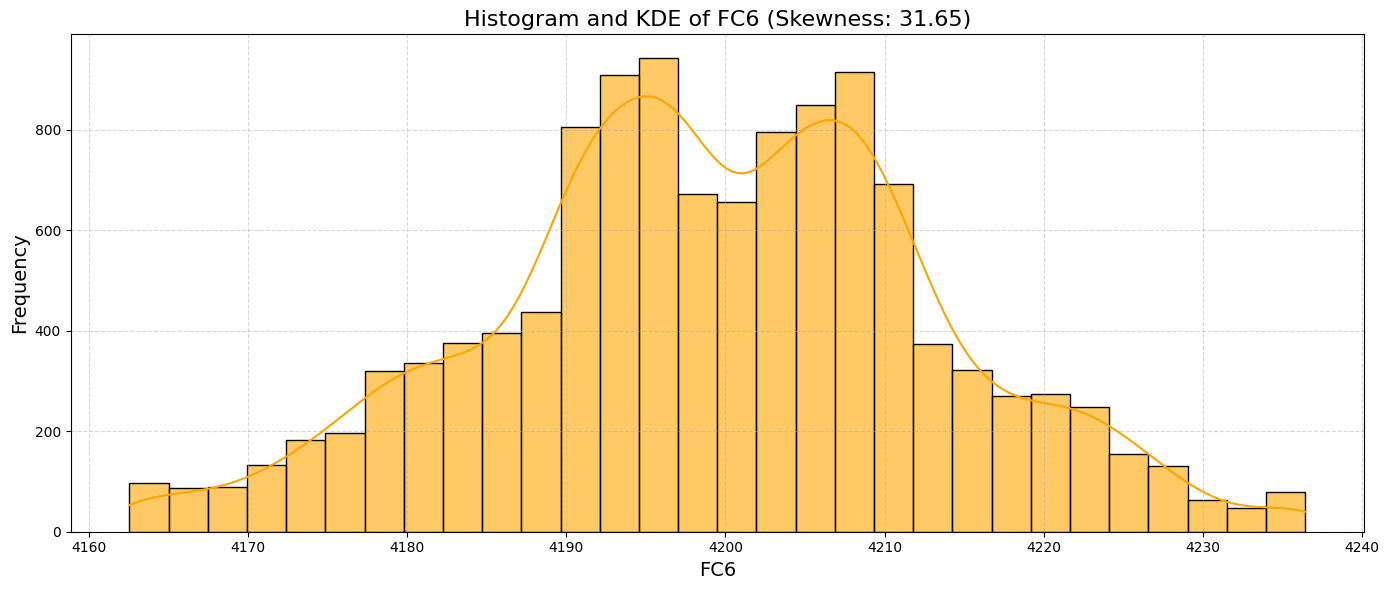

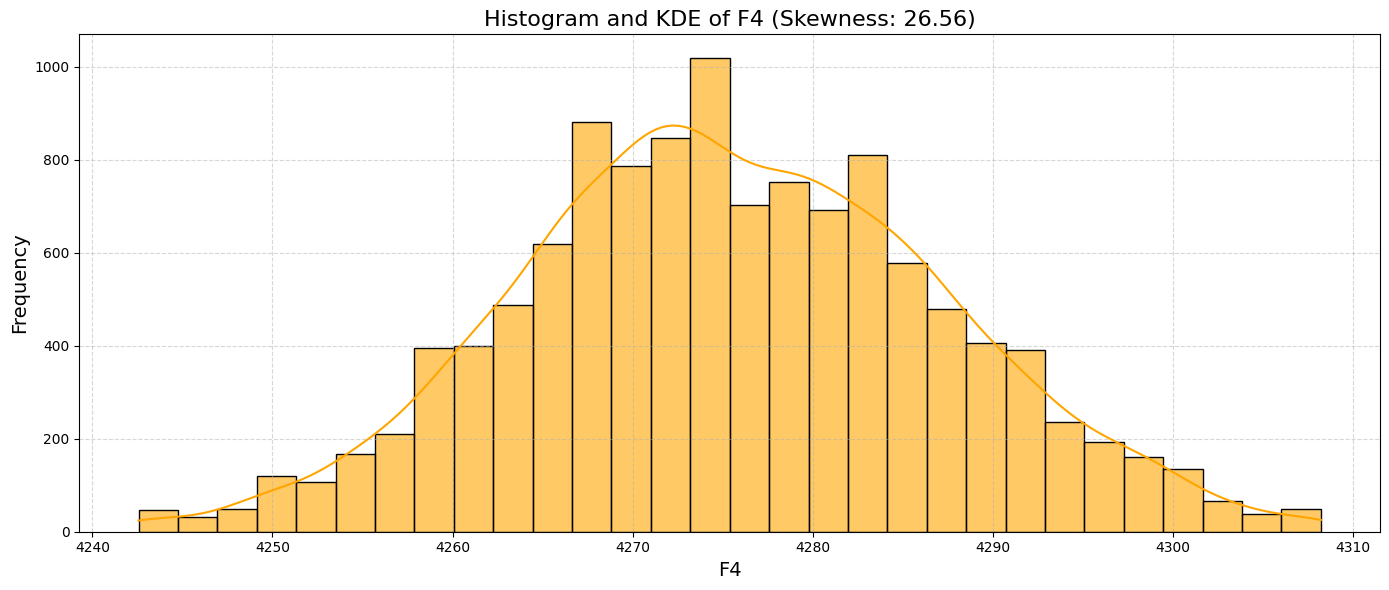

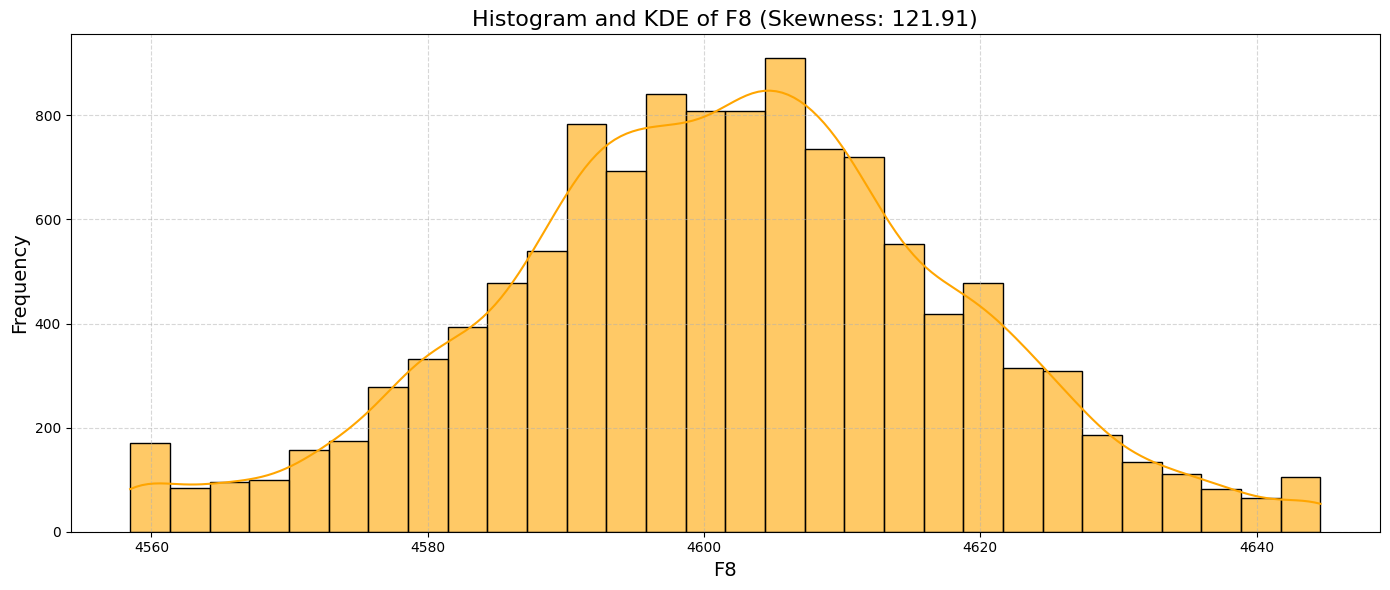

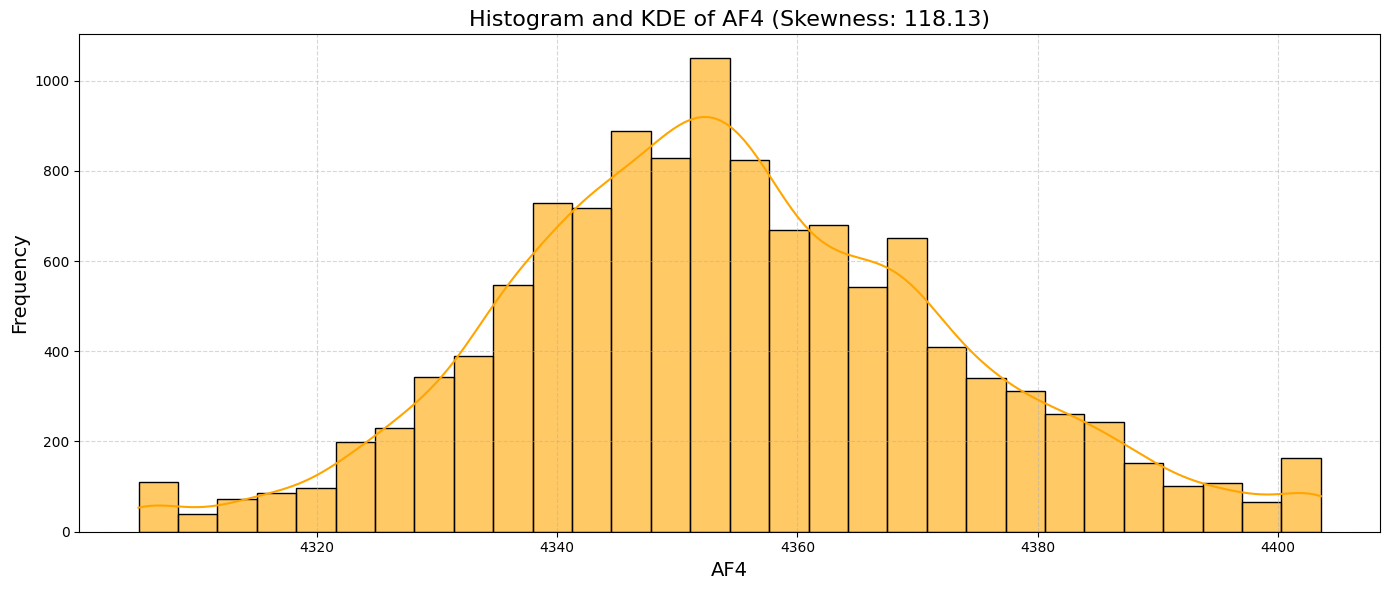

In [26]:
# Plot histograms and KDE plots for each feature
for column in remaining_outliers_capped.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'eyeDetection':  # Exclude the target column
        plt.figure(figsize=(14, 6))

        # Histogram with KDE plot
        sns.histplot(remaining_outliers_capped[column], kde=True, bins=30, color='orange', alpha=0.6)
        plt.title(f"Histogram and KDE of {column} (Skewness: {data[column].skew():.2f})", fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

# 6. Exploratory Data Analysis

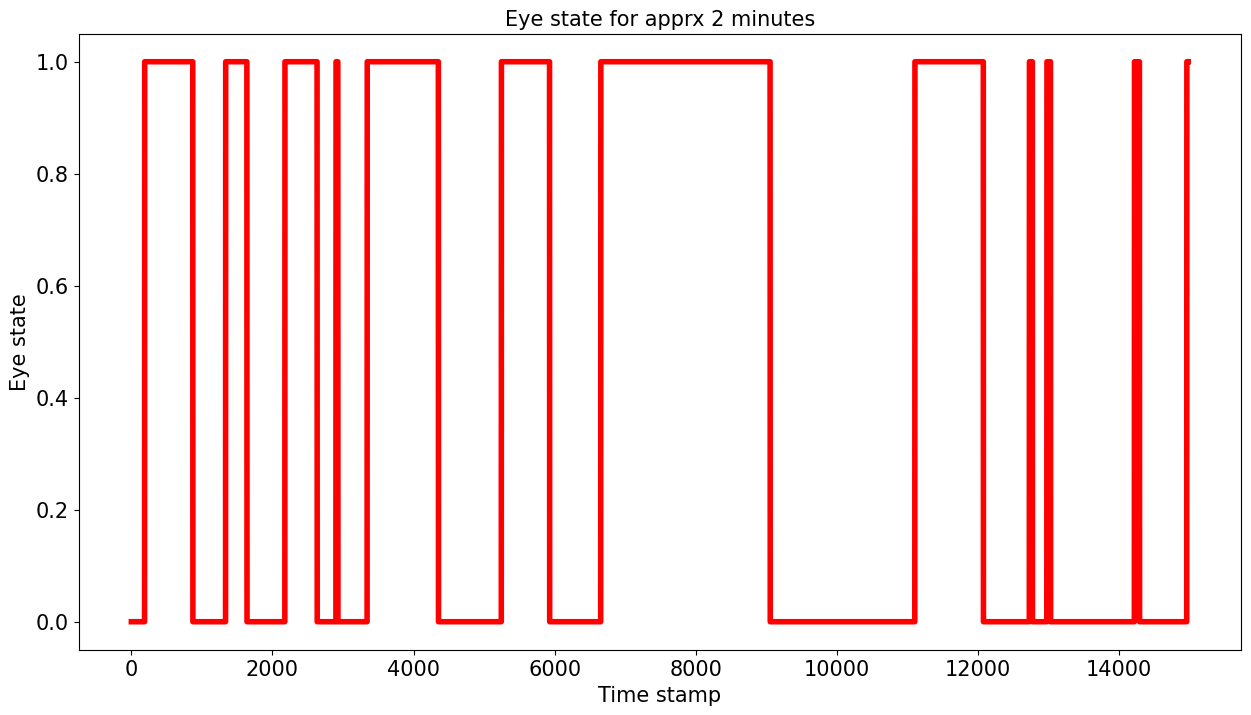

In [27]:
plt.figure(figsize=(15,8))
data['eyeDetection'].plot(linestyle='solid',color='red',linewidth=4)
plt.title('Eye state for apprx 2 minutes',size='15')
plt.xlabel('Time stamp',size='15')
plt.ylabel('Eye state',size='15')
plt.xticks(size='15')
plt.yticks(size='15')
plt.show()

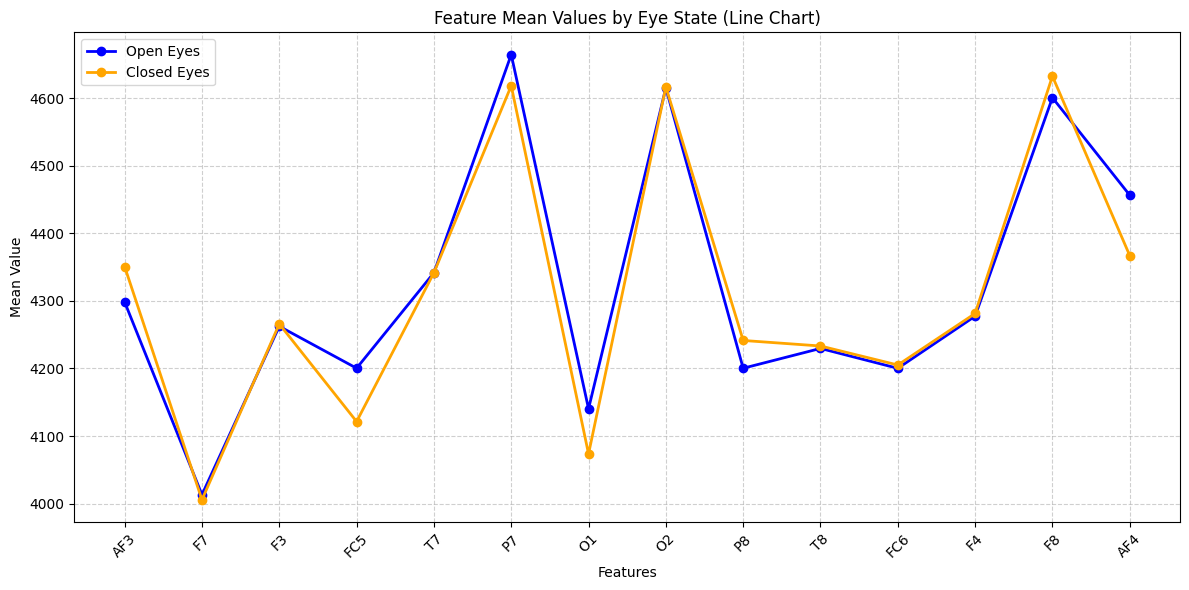

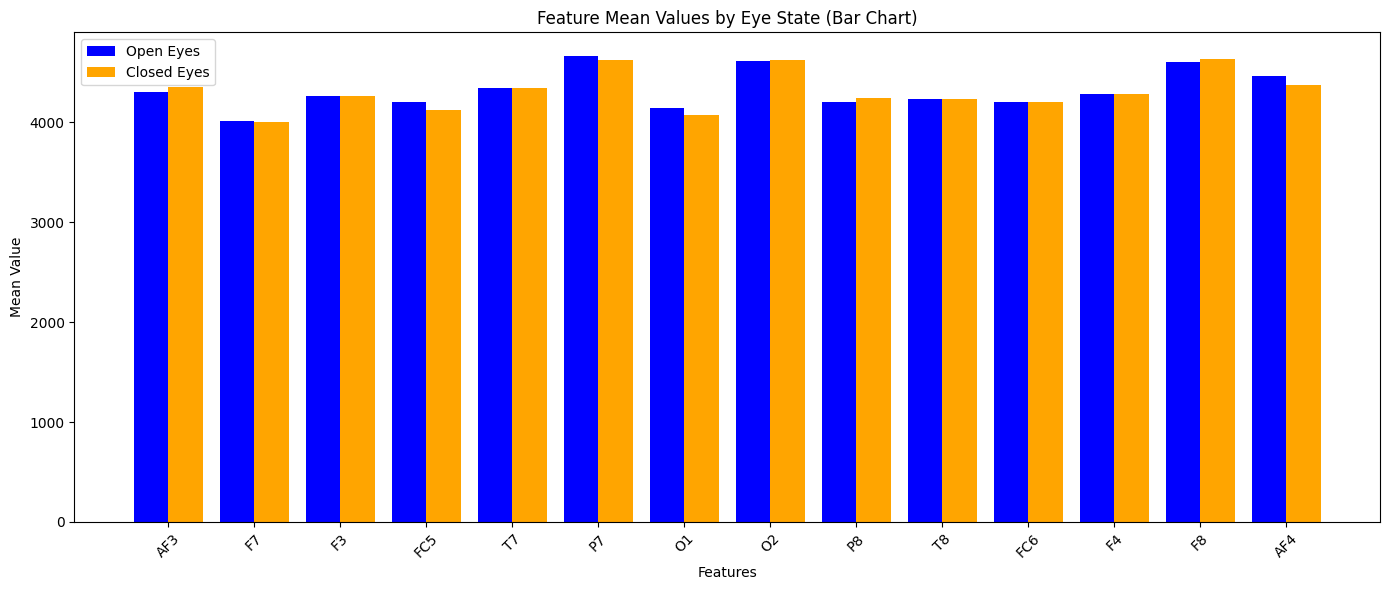

In [28]:
open_eyes = data[data['eyeDetection'] == 0]
closed_eyes = data[data['eyeDetection'] == 1]

# Calculate mean values for open and closed eyes
open_eyes_mean = open_eyes.mean()
closed_eyes_mean = closed_eyes.mean()

# Drop the 'eyeDetection' column from the mean values
open_eyes_mean = open_eyes_mean.drop(labels=['eyeDetection'])
closed_eyes_mean = closed_eyes_mean.drop(labels=['eyeDetection'])

# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(open_eyes_mean.index, open_eyes_mean.values, label='Open Eyes', marker='o', color='blue', linewidth=2)
plt.plot(closed_eyes_mean.index, closed_eyes_mean.values, label='Closed Eyes', marker='o', color='orange', linewidth=2)
plt.title("Feature Mean Values by Eye State (Line Chart)")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Bar Chart
x = np.arange(len(open_eyes_mean.index))  # Feature indices
plt.figure(figsize=(14, 6))
plt.bar(x - 0.2, open_eyes_mean.values, width=0.4, label='Open Eyes', color='blue')
plt.bar(x + 0.2, closed_eyes_mean.values, width=0.4, label='Closed Eyes', color='orange')
plt.title("Feature Mean Values by Eye State (Bar Chart)")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.xticks(x, open_eyes_mean.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

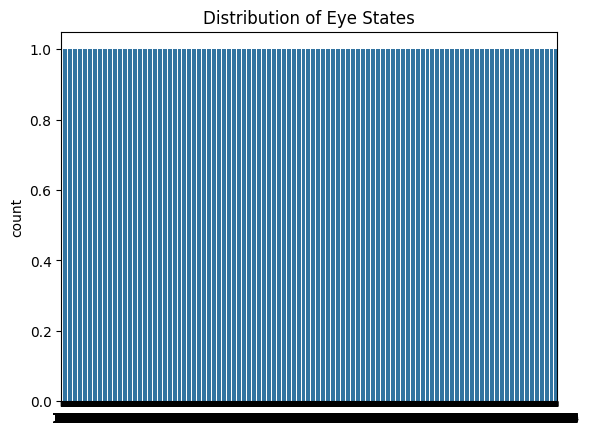

In [29]:
# Visualize the target variable distribution
target_column = 'eyeDetection'
sns.countplot(data[target_column])
plt.title('Distribution of Eye States')
plt.show()

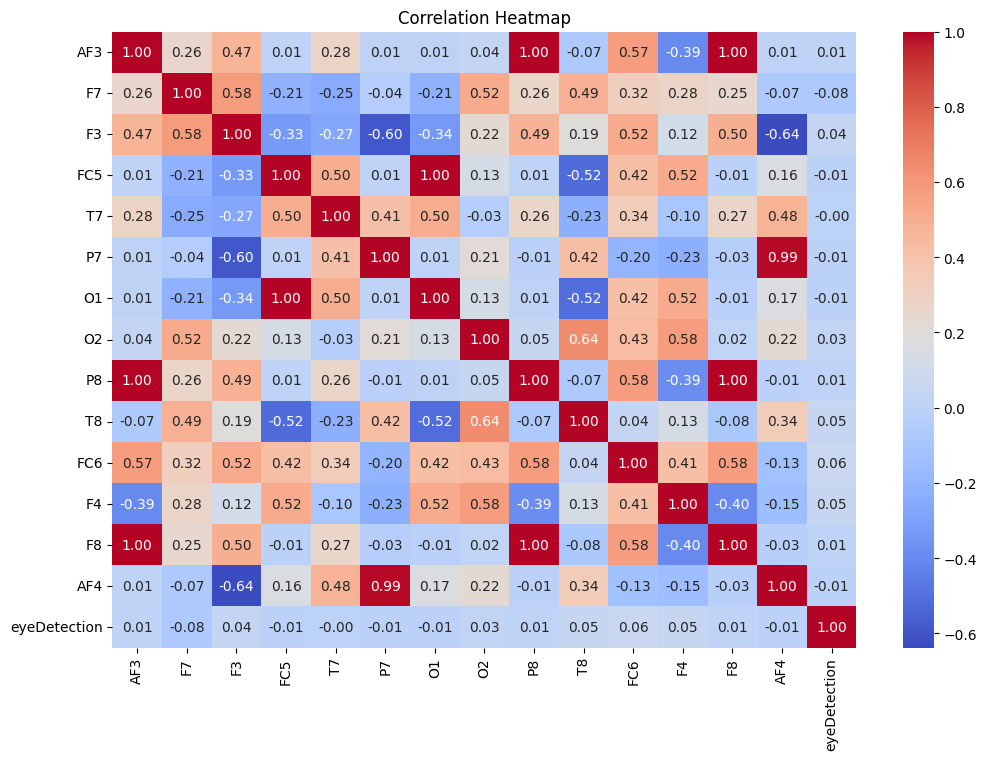

In [30]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# 7.Feature Engineering

**There is no categorical features.**

In [31]:
remaining_outliers_capped['eyeDetection'].value_counts()

,count
eyeDetection,
0,6456
1,5397


Balancing the dataset

In [32]:

# Assuming 'data_final' is the cleaned dataset after capping
X = remaining_outliers_capped.drop(columns=['eyeDetection'])  # Features
y = remaining_outliers_capped['eyeDetection']                 # Target

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verify class balance
from collections import Counter
print("Class Distribution After SMOTE:", Counter(y_balanced))

Class Distribution After SMOTE: Counter({0: 6456, 1: 6456})


In [33]:
# Display initial data shape and class distribution
print("Initial data shape:", remaining_outliers_capped.shape)
print("Class distribution of eyeDetection:\n", remaining_outliers_capped['eyeDetection'].value_counts())

# Step 1: Separate the features (X) and target (y)
X = remaining_outliers_capped.drop('eyeDetection', axis=1)  # Features excluding the target
y = remaining_outliers_capped['eyeDetection']  # Target column

# Apply SMOTE first to balance the classes, you can change this line in accordance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)




# Step 4: Convert the resampled data back to a DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['eyeDetection'])

# Step 5: Optionally, combine the resampled features and target back into a single DataFrame
b_data= pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Step 6: Check the new class distribution to ensure balance
print(b_data['eyeDetection'].value_counts())

Initial data shape: (11853, 15)
Class distribution of eyeDetection:
 eyeDetection
0    6456
1    5397
Name: count, dtype: int64
eyeDetection
0    6456
1    6456
Name: count, dtype: int64


In [34]:
b_data.shape

(12912, 15)

# 8.Feature Selection

Top Features by Importance:
    Feature  Importance
6       O1    0.130474
5       P7    0.117558
1       F7    0.083553
12      F8    0.079607
0      AF3    0.078949
13     AF4    0.073408
11      F4    0.059456
10     FC6    0.059402
3      FC5    0.058853
7       O2    0.058651
2       F3    0.053500
9       T8    0.050840
4       T7    0.050562
8       P8    0.045187


<ipython-input-35-8cfc569956e5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette="viridis")


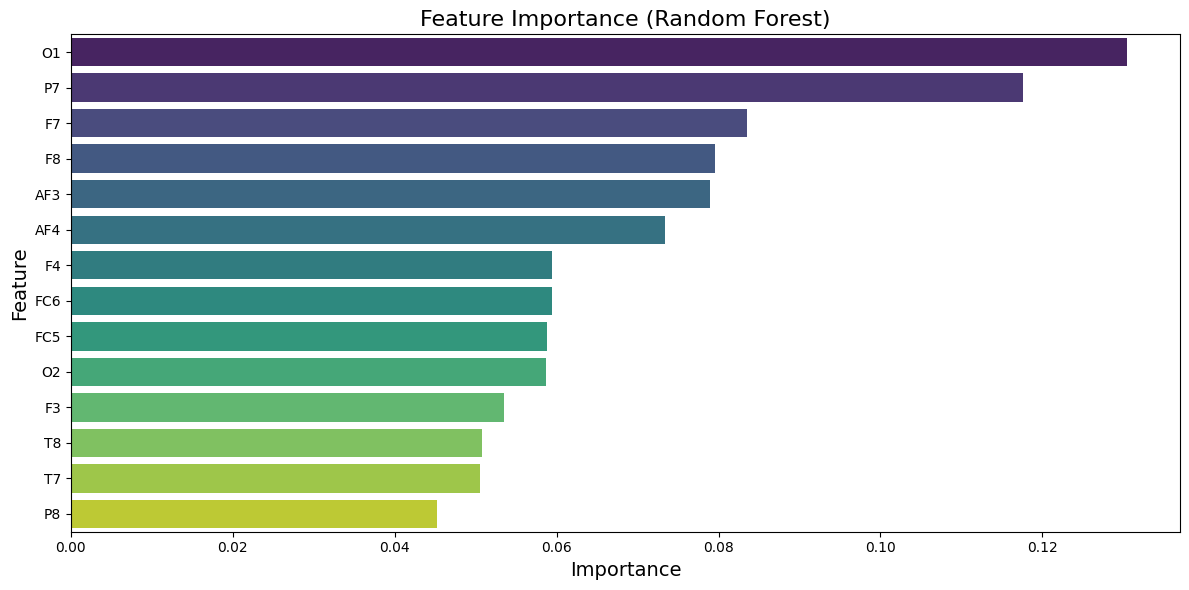

In [35]:



# Separate features (X) and target (y) from the balanced dataset
X = b_data.drop('eyeDetection', axis=1)
y = b_data['eyeDetection']

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features by Importance:\n", feature_importances)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette="viridis")
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()


In [36]:


# Set a threshold for feature importance (e.g., retain features with importance >= 0.06)
threshold = 0.06
important_features = feature_importances[feature_importances['Importance'] >= threshold]['Feature']

# Filter the dataset to keep only important features and the target column
filtered_data = b_data[important_features.to_list() + ['eyeDetection']]

# Check the shape and top rows of the filtered dataset
print("Filtered Data Shape:", filtered_data.shape)
print("Top Rows of Filtered Data:\n", filtered_data.head())

Filtered Data Shape: (12912, 7)
Top Rows of Filtered Data:
         O1        P7       F7       F8      AF3      AF4  eyeDetection
0  4089.23  4594.355  4013.85  4630.26  4316.41  4375.90             0
1  4092.82  4595.900  4008.72  4611.79  4305.13  4357.95             0
2  4092.31  4596.410  3994.87  4597.95  4293.33  4347.69             0
3  4096.92  4594.360  3994.36  4602.05  4297.44  4350.77             0
4  4102.05  4595.380  4007.18  4614.36  4308.21  4374.87             0


# 9. Split the data into training and test

In [37]:


# Separate features (X) and target (y)
X = filtered_data.drop('eyeDetection', axis=1)  # Features
y = filtered_data['eyeDetection']  # Target

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Check class distributions in the splits
print("\nClass Distribution in Training Data:\n", y_train.value_counts())
print("\nClass Distribution in Testing Data:\n", y_test.value_counts())


Training Features Shape: (10329, 6)
Testing Features Shape: (2583, 6)
Training Labels Shape: (10329,)
Testing Labels Shape: (2583,)

Class Distribution in Training Data:
 eyeDetection
1    5165
0    5164
Name: count, dtype: int64

Class Distribution in Testing Data:
 eyeDetection
0    1292
1    1291
Name: count, dtype: int64


# 10.Feature Scaling

In [38]:


# Initialize the scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm scaling is applied
print("Feature Scaling Applied. Example of Scaled Features:\n")
print("Scaled Training Data (First 5 rows):\n", X_train_scaled[:5])


Feature Scaling Applied. Example of Scaled Features:

Scaled Training Data (First 5 rows):
 [[ 1.86681510e+00 -6.42684299e-01 -1.31174813e+00 -1.60134181e-01
  -1.12342058e-01  7.02646789e-02]
 [-6.67850653e-01  4.50793705e-01 -1.38584050e-01  4.19720258e-01
  -3.33231106e-01 -1.12050410e-02]
 [ 9.66270621e-01  8.71990189e-01  2.60680914e+00 -2.56935503e+00
   2.37037782e+00  1.55932099e+00]
 [-4.15980690e-02 -1.21835445e-01 -5.78580166e-01  2.30403499e-02
  -1.89753424e-03  1.78714631e-01]
 [-7.57398376e-01 -1.21835445e-01 -4.80856218e-01 -1.25799192e+00
  -1.52118318e+00 -1.36762297e+00]]


# 11.Built the ML Models

In [39]:


# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and fit each model
for model_name, model in models.items():
    print(f"Training Model: {model_name}")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Print a message to confirm training completion
    print(f"{model_name} trained successfully.")


Training Model: Logistic Regression
Logistic Regression trained successfully.
Training Model: Support Vector Classifier
Support Vector Classifier trained successfully.
Training Model: Decision Tree Classifier
Decision Tree Classifier trained successfully.
Training Model: Random Forest Classifier
Random Forest Classifier trained successfully.
Training Model: Gradient Boosting Classifier
Gradient Boosting Classifier trained successfully.
Training Model: Gaussian Naive Bayes
Gaussian Naive Bayes trained successfully.
Training Model: K-Nearest Neighbors
K-Nearest Neighbors trained successfully.


# 12.Model evaluation


Model: Logistic Regression
Accuracy: 0.6806
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1292
           1       0.68      0.67      0.68      1291

    accuracy                           0.68      2583
   macro avg       0.68      0.68      0.68      2583
weighted avg       0.68      0.68      0.68      2583



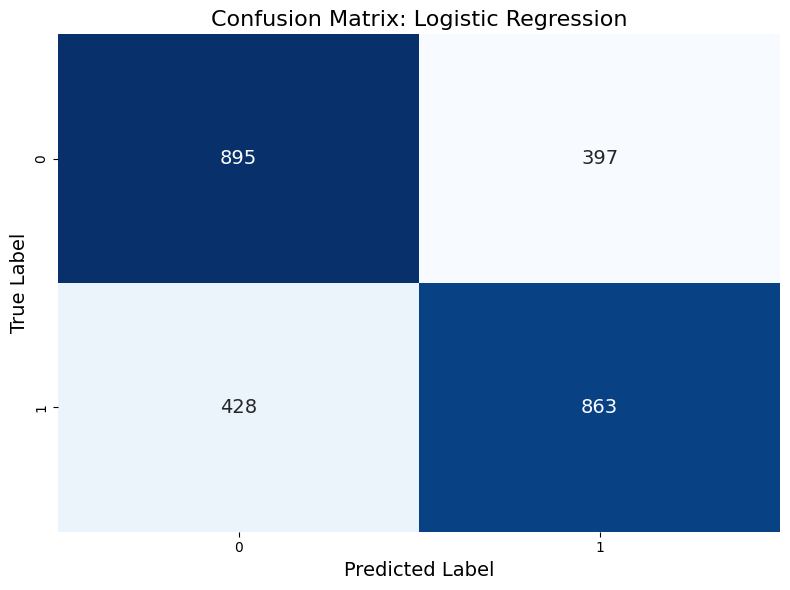


Model: Support Vector Classifier
Accuracy: 0.8192
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1292
           1       0.82      0.81      0.82      1291

    accuracy                           0.82      2583
   macro avg       0.82      0.82      0.82      2583
weighted avg       0.82      0.82      0.82      2583



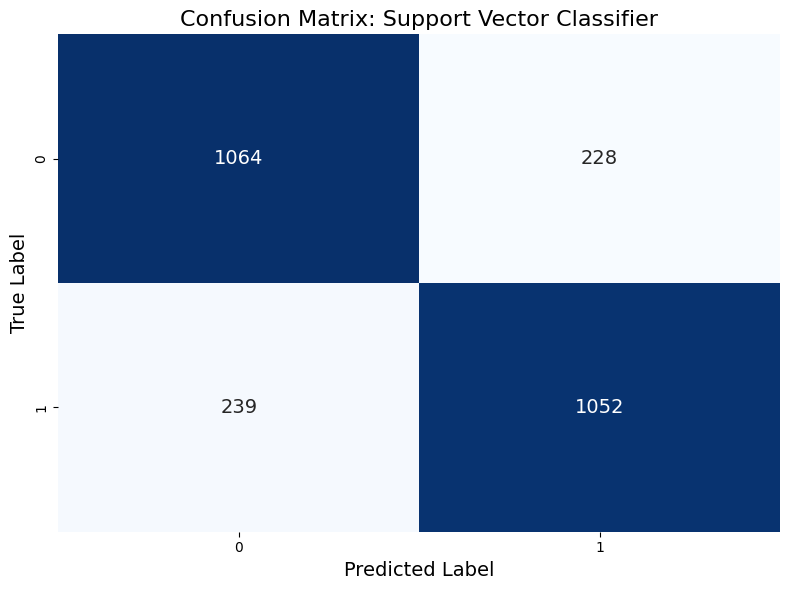


Model: Decision Tree Classifier
Accuracy: 0.7770
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1292
           1       0.78      0.77      0.77      1291

    accuracy                           0.78      2583
   macro avg       0.78      0.78      0.78      2583
weighted avg       0.78      0.78      0.78      2583



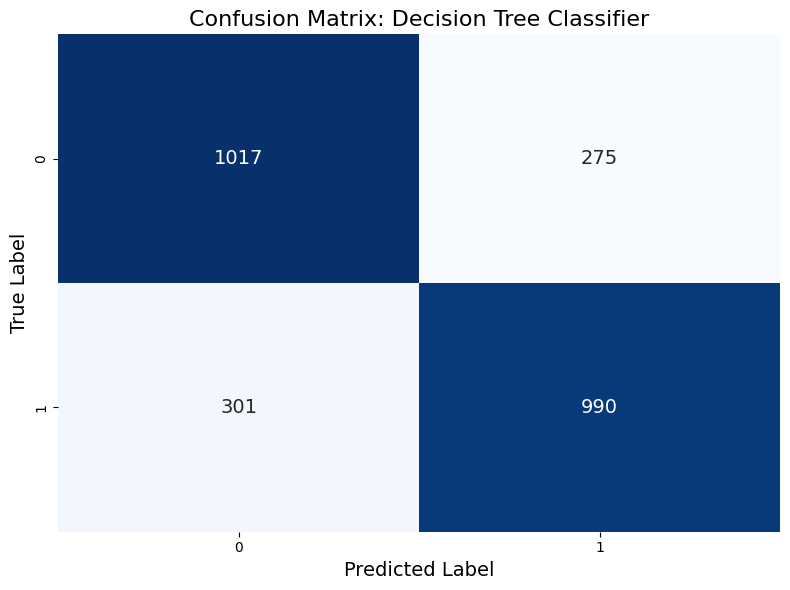


Model: Random Forest Classifier
Accuracy: 0.8548
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1292
           1       0.86      0.85      0.85      1291

    accuracy                           0.85      2583
   macro avg       0.85      0.85      0.85      2583
weighted avg       0.85      0.85      0.85      2583



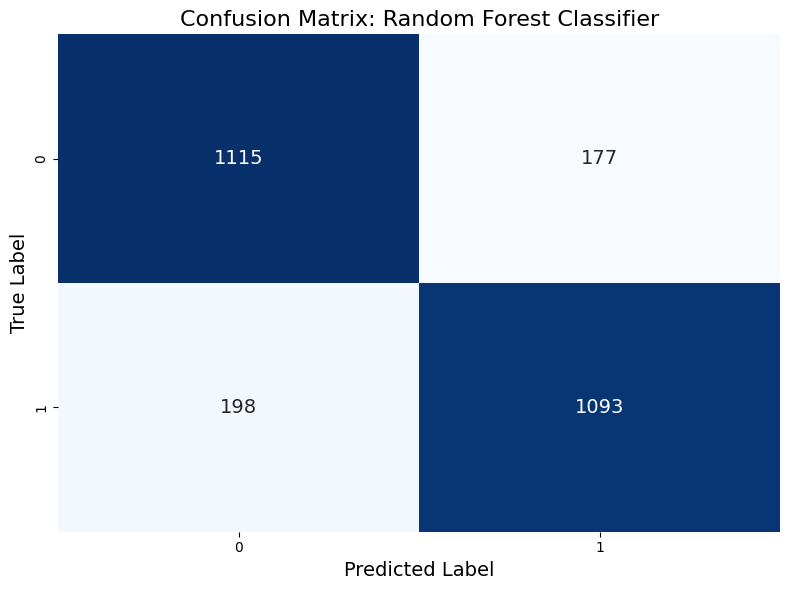


Model: Gradient Boosting Classifier
Accuracy: 0.7689
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1292
           1       0.77      0.76      0.77      1291

    accuracy                           0.77      2583
   macro avg       0.77      0.77      0.77      2583
weighted avg       0.77      0.77      0.77      2583



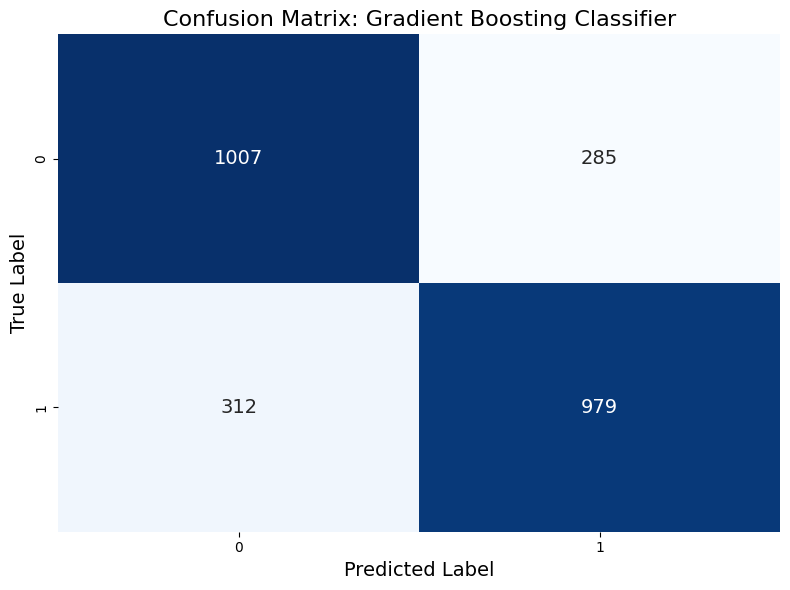


Model: Gaussian Naive Bayes
Accuracy: 0.6911
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1292
           1       0.71      0.64      0.67      1291

    accuracy                           0.69      2583
   macro avg       0.69      0.69      0.69      2583
weighted avg       0.69      0.69      0.69      2583



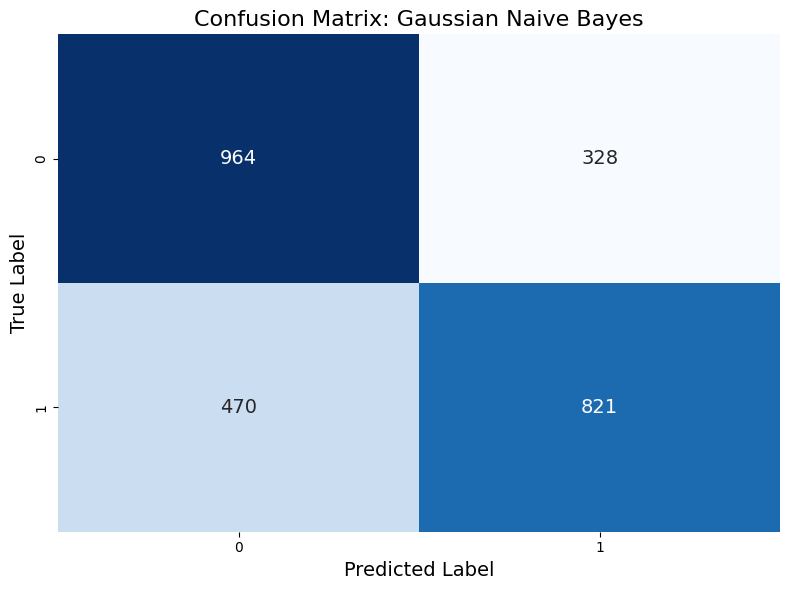


Model: K-Nearest Neighbors
Accuracy: 0.8765
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1292
           1       0.87      0.88      0.88      1291

    accuracy                           0.88      2583
   macro avg       0.88      0.88      0.88      2583
weighted avg       0.88      0.88      0.88      2583



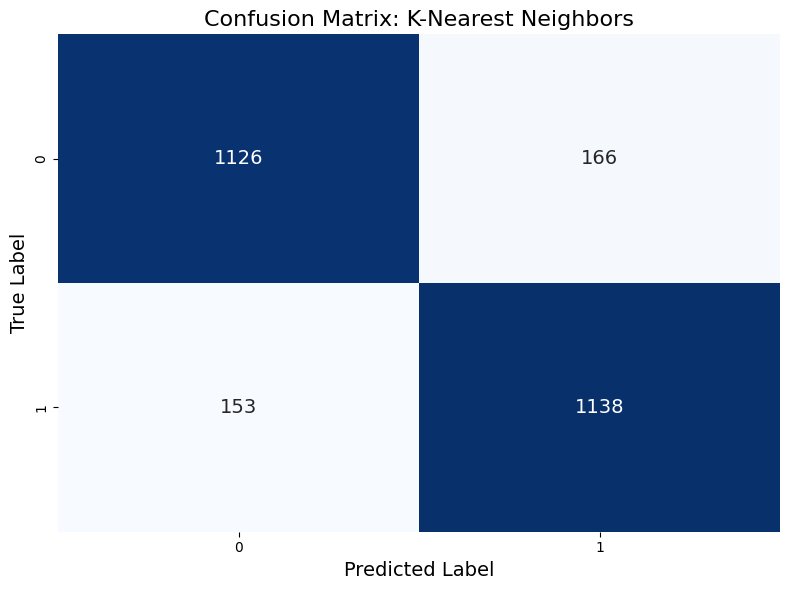

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a list to store test accuracies
test_accuracies = []

# Evaluate models
for model_name, model in models.items():
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    test_accuracy = model.score(X_test_scaled, y_test)
    test_accuracies.append(test_accuracy)

    # Print model evaluation results
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Generate and visualize confusion matrix
    con = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
    plt.title(f"Confusion Matrix: {model_name}", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)
    plt.tight_layout()
    plt.show()


<ipython-input-41-428453110936>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data=accuracy_df, palette="viridis")


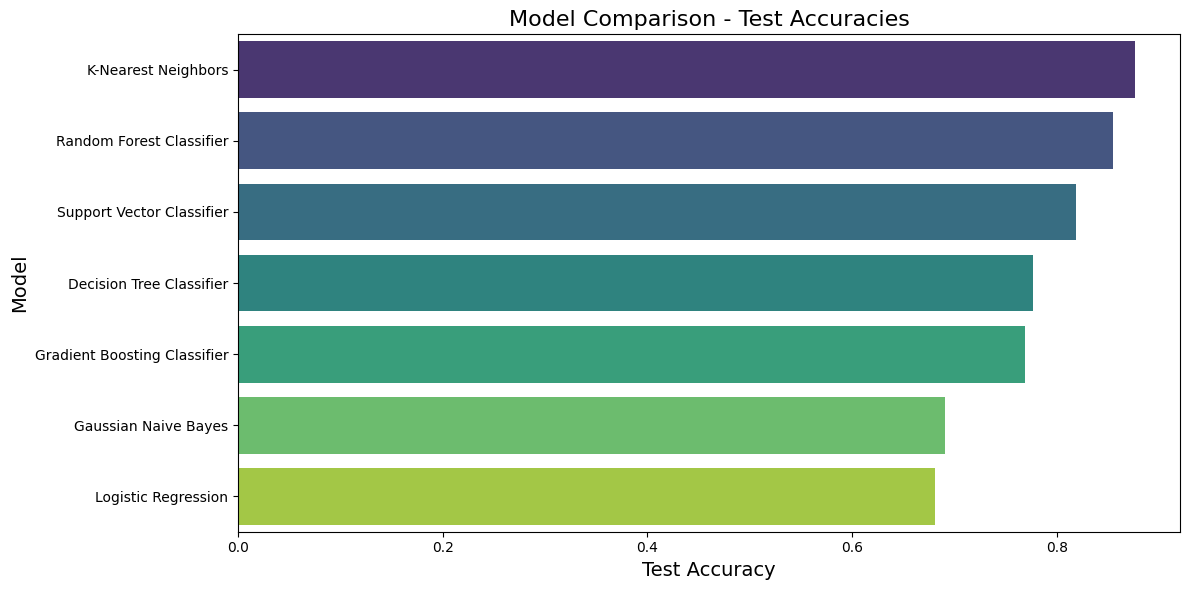


Model Performance Summary:
                          Model  Test Accuracy
6           K-Nearest Neighbors       0.876500
3      Random Forest Classifier       0.854820
1     Support Vector Classifier       0.819202
2      Decision Tree Classifier       0.777003
4  Gradient Boosting Classifier       0.768873
5          Gaussian Naive Bayes       0.691057
0           Logistic Regression       0.680604


In [41]:


# Create a DataFrame for test accuracies
accuracy_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Test Accuracy': test_accuracies
})

# Sort models by accuracy for better visualization
accuracy_df = accuracy_df.sort_values(by='Test Accuracy', ascending=False)

# Bar plot of test accuracies
plt.figure(figsize=(12, 6))
sns.barplot(x='Test Accuracy', y='Model', data=accuracy_df, palette="viridis")
plt.title("Model Comparison - Test Accuracies", fontsize=16)
plt.xlabel("Test Accuracy", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.tight_layout()
plt.show()

# Display the accuracy DataFrame
print("\nModel Performance Summary:")
print(accuracy_df)



Evaluating ROC Curve: Logistic Regression


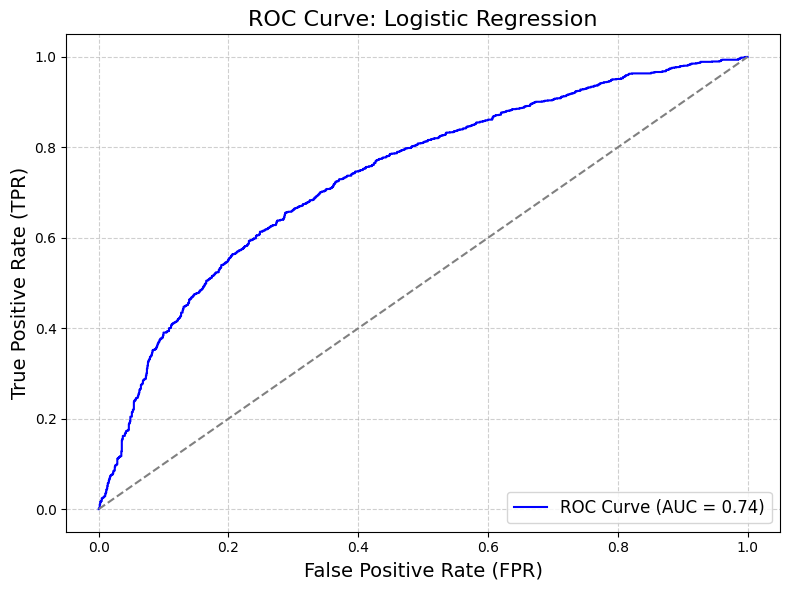


Evaluating ROC Curve: Support Vector Classifier


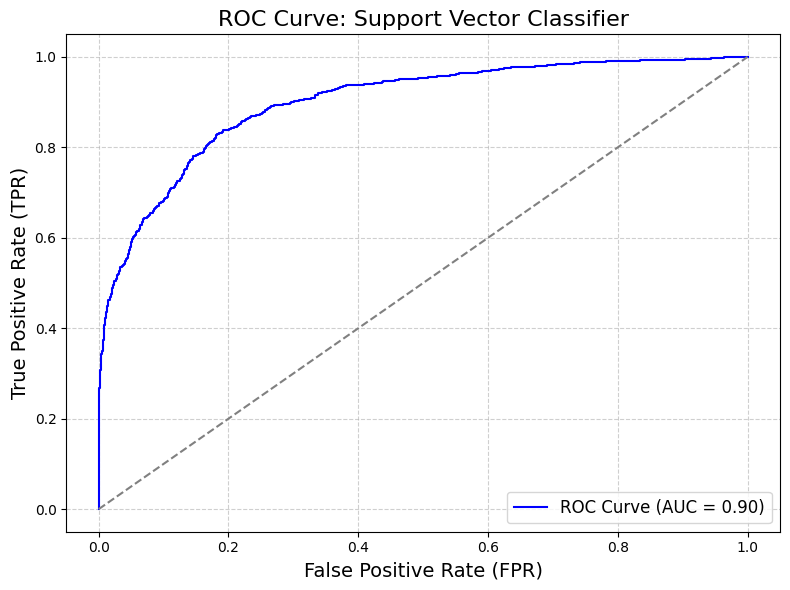


Evaluating ROC Curve: Decision Tree Classifier


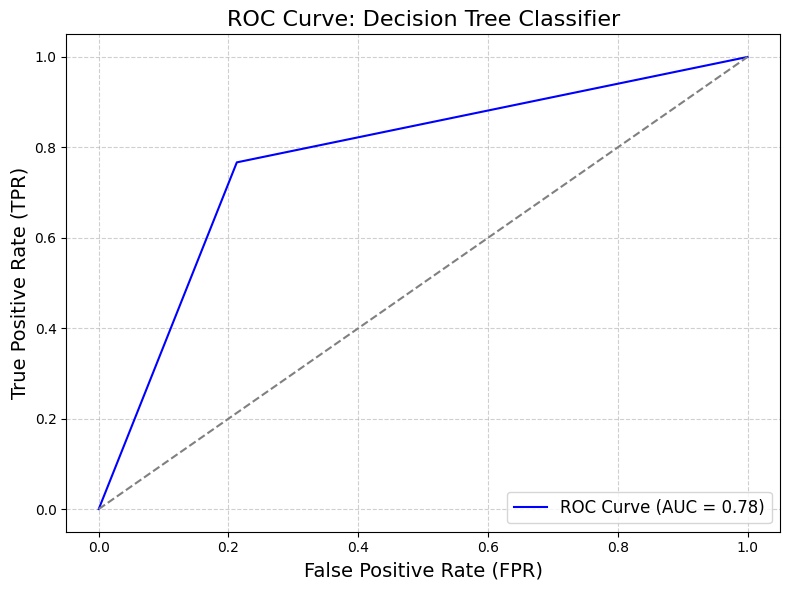


Evaluating ROC Curve: Random Forest Classifier


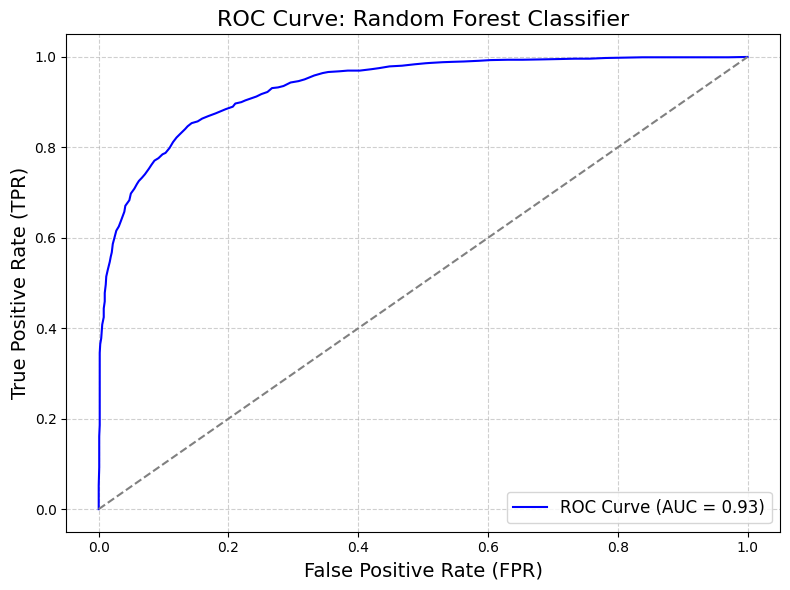


Evaluating ROC Curve: Gradient Boosting Classifier


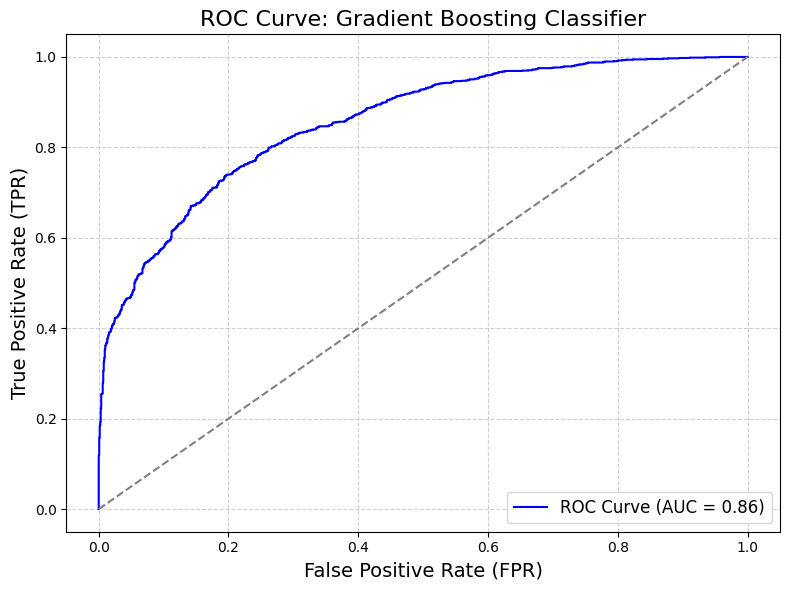


Evaluating ROC Curve: Gaussian Naive Bayes


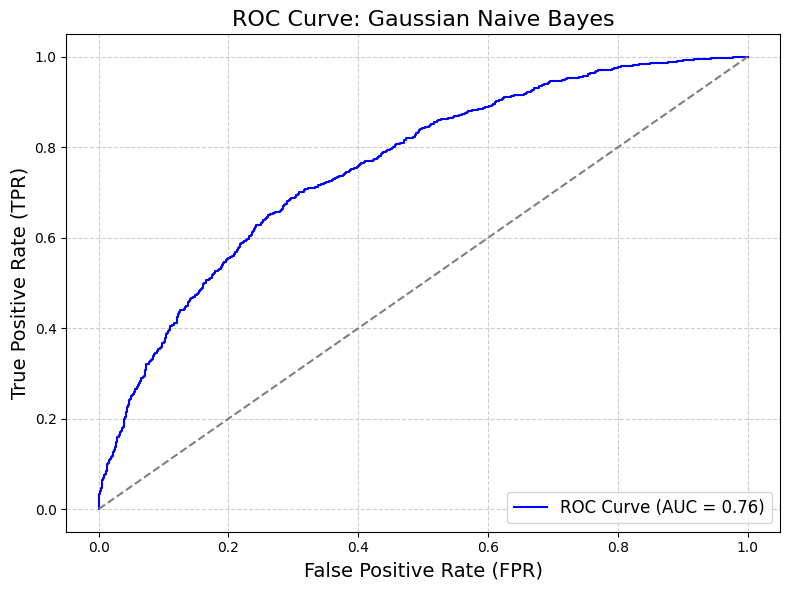


Evaluating ROC Curve: K-Nearest Neighbors


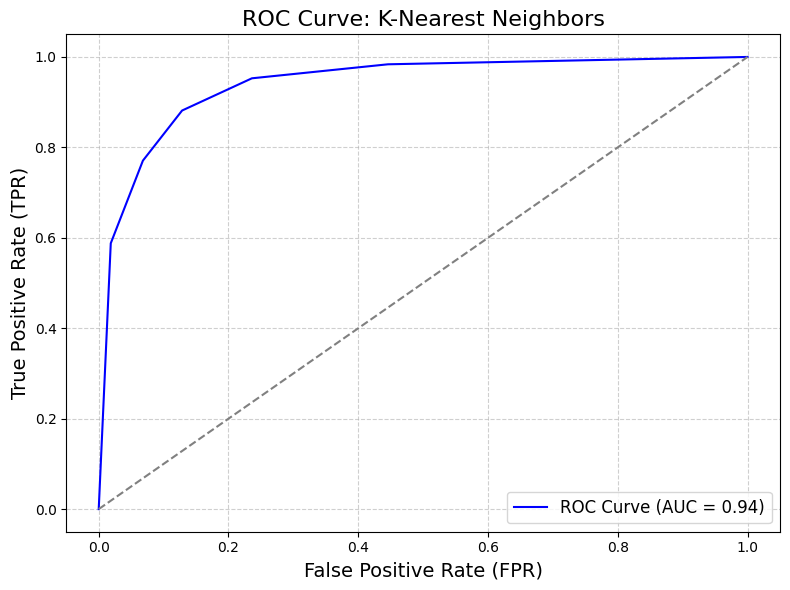

In [42]:

# Evaluate and plot ROC Curve for each model
for model_name, model in models.items():
    print(f"\nEvaluating ROC Curve: {model_name}")

    # Check if the model supports `predict_proba`
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability for positive class
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test_scaled)  # Decision function scores
    else:
        print(f"{model_name} does not support probability estimates. Skipping ROC Curve.")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
    plt.title(f"ROC Curve: {model_name}", fontsize=16)
    plt.xlabel("False Positive Rate (FPR)", fontsize=14)
    plt.ylabel("True Positive Rate (TPR)", fontsize=14)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# 13. Hyperparameter Tuning

In [43]:



# Define parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Decision Tree Classifier': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest Classifier': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting Classifier': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7]
    },
    'Gaussian Naive Bayes': {},  # No hyperparameters to tune
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}



In [44]:

# Dictionary to store the best models
best_models = {}

# Perform hyperparameter tuning
for model_name, model in models.items():
    print(f"Tuning Hyperparameters for {model_name}...")

    # Get parameter grid
    param_grid = param_grids.get(model_name, {})

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit GridSearchCV
    grid_search.fit(X_train_scaled, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_

    # Print best parameters and cross-validation score
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")





Tuning Hyperparameters for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best Cross-Validation Accuracy for Logistic Regression: 0.6713
Tuning Hyperparameters for Support Vector Classifier...
Best Parameters for Support Vector Classifier: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy for Support Vector Classifier: 0.8423
Tuning Hyperparameters for Decision Tree Classifier...
Best Parameters for Decision Tree Classifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy for Decision Tree Classifier: 0.7848
Tuning Hyperparameters for Random Forest Classifier...
Best Parameters for Random Forest Classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Accuracy for Random Forest Classifier: 0.8524
Tuning Hyperparameters for Gradient Boosting Classifier...
Best Parameters for Gradient Boosting Classifi

# 14. Save the model

In [45]:


# Save the best model
best_model_name = 'K-Nearest Neighbors'
best_model = best_models[best_model_name]
joblib.dump(best_model, 'best_knn_model.pkl')
print(f"Best model '{best_model_name}' saved as 'best_knn_model.pkl'.")


Best model 'K-Nearest Neighbors' saved as 'best_knn_model.pkl'.


# 15. Test with Unseendata

In [46]:



# Load unseen data from CSV file
unseen_data = pd.read_csv('/content/unseendata.csv')

# Display the first few rows of the dataset
print("Initial Unseen Data:")
print(unseen_data.head())

Initial Unseen Data:
       O1        P7       F7      F8      AF3     AF4
0  4097.0  4594.305  4012.85  4630.0  4315.41  4390.0
1  4096.5  4595.410  4008.72  4627.5  4315.13  4387.5
2  4100.0  4596.310  3996.87  4635.0  4298.33  4395.0
3  4099.0  4594.420  3997.36  4633.0  4299.44  4393.0
4  4095.0  4595.308  4008.18  4629.0  4310.21  4389.0


In [47]:
# Check for missing values
unseen_data.isnull().sum()

,0
O1,0
P7,0
F7,0
F8,0
AF3,0
AF4,0


In [48]:
unseen_data.head()

,O1,P7,F7,F8,AF3,AF4
0,4097.0,4594.305,4012.85,4630.0,4315.41,4390.0
1,4096.5,4595.410,4008.72,4627.5,4315.13,4387.5
2,4100.0,4596.310,3996.87,4635.0,4298.33,4395.0
3,4099.0,4594.420,3997.36,4633.0,4299.44,4393.0
4,4095.0,4595.308,4008.18,4629.0,4310.21,4389.0


In [49]:

unseen_data.duplicated().sum()

0

In [50]:
# 1. Check for skewness
skewness = unseen_data.select_dtypes(include='number').skew()
print("\nSkewness of each feature:")
print(skewness)


Skewness of each feature:
O1     0.117188
P7     0.443360
F7    -0.315267
F8     0.459695
AF3   -0.365359
AF4    0.459695
dtype: float64


In [51]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   O1      5 non-null      float64
 1   P7      5 non-null      float64
 2   F7      5 non-null      float64
 3   F8      5 non-null      float64
 4   AF3     5 non-null      float64
 5   AF4     5 non-null      float64
dtypes: float64(6)
memory usage: 372.0 bytes


In [52]:
# Standardize the capped dataset
scaler = StandardScaler()
unseen_data_scaled = scaler.fit_transform(unseen_data)

# Convert back to DataFrame for consistency
unseen_data_scaled = pd.DataFrame(unseen_data_scaled, columns=unseen_data.columns)


In [53]:


# Load the best saved model
best_model = joblib.load('best_knn_model.pkl')  # Replace with your saved model

# Predict on unseen data
predictions = best_model.predict(unseen_data_scaled)

# Display predictions
print("\nPredictions on unseen data:")
print(predictions)



Predictions on unseen data:
[1 0 1 1 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### **16. Interpretation of Results (Conclusion):**

- **Predictions:** The model predicted the following for the unseen data:
  ```
  [1, 0, 1, 1, 0]
  ```
  - A prediction of `1` indicates that the eye state is **closed**.
  - A prediction of `0` indicates that the eye state is **open**.
  - In this case, the model predicts that:
    - Row 1 and Row 5 correspond to **open eyes**.
    - Rows 2, 3, and 4 correspond to **closed eyes**.

- **Model Selection:**
  - The **K-Nearest Neighbors (KNN)** classifier was selected as the best model after hyperparameter tuning.
  - It achieved an accuracy of approximately **88%** on the test data, demonstrating its effectiveness in predicting eye states based on EEG data.

- **Limitations:**
  1. **Feature Dependence:** Predictions are only as good as the quality and relevance of the selected features.
  2. **Unseen Data Quality:** The quality of predictions depends on how well the unseen data matches the distribution of the training data. Any discrepancies (e.g., different noise levels or scaling) may lead to reduced performance.
  3. **Model Generalization:** The model is trained on a specific dataset. External factors like user activity, device noise, or environmental differences can impact real-world results.

---

### **17. Future Work:**

1. **Improved Feature Engineering:**
   - Revisit feature selection and explore advanced methods like Principal Component Analysis (PCA) to reduce dimensionality while retaining critical information.

2. **Outlier and Skewness Handling:**
   - Address skewness in features more thoroughly, perhaps with robust scaling or advanced transformations.

3. **Model Exploration:**
   - Evaluate more complex models like Neural Networks, which may capture deeper patterns in the EEG signals.

4. **Real-Time Testing:**
   - Implement the model in a real-world setting (e.g., gaming or assistive technology) and evaluate its performance with live EEG data.

5. **Periodic Retraining:**
   - Retrain the model periodically using new data to account for changes in user behavior or environmental conditions.

6. **Data Collection Improvements:**
   - Ensure consistent and high-quality data collection methods for both training and unseen datasets to enhance model accuracy.

7. **Address Class Imbalance:**
   - If future datasets exhibit imbalanced classes (e.g., more open-eye data than closed-eye data), use resampling techniques like SMOTE to balance the classes.

8. **Exploration of Temporal Patterns:**
   - Investigate temporal dependencies in EEG data using sequence models like Recurrent Neural Networks (RNNs).

---

### **Summary:**
- The model accurately predicts eye states (open or closed) in unseen data with high confidence. However, future work should focus on refining feature engineering, handling skewness, and testing in real-world scenarios to further enhance accuracy and robustness.